purpose: to compare the genetic correlations and heritability calculated by LDSC bs GCTA

# set-up

In [1]:
library(ggplot2)
library(dplyr)
library(reshape2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
getwd()

[1] "/tscc/projects/ps-palmer/brittany/SUD_cross_species/scripts"

In [3]:
setwd('/tscc/projects/ps-palmer/brittany/SUD_cross_species/')

In [4]:
#rerun removed regressedlr_nicsa_day1_infusion because it had a negative heritability estimate
#set true if want to use rerun LDSC values
rerun=FALSE

# import genetic correlation and heritability tables

In [5]:
nicsa_traits=read.table('scripts/nicsa_munge_ref/nicsa_traits.csv',sep=',',header=TRUE)

## GCTA- from GWAS pipeline- calculated by Thiago

In [6]:
herit_GCTA=read.table("nicsa_gwas/heritability.tsv",sep='\t',header=TRUE)
corr_tbl_GCTA=read.table('nicsa_gwas/genetic_correlation_melted_table.csv',sep=',',header=TRUE) #missing traits
corr_tbl_GCTA$trait1<-substring(corr_tbl_GCTA$trait1, first = 19)
corr_tbl_GCTA$trait2<-substring(corr_tbl_GCTA$trait2, first = 19)
corr_matrix_GCTA=read.table('nicsa_gwas/genetic_correlation_matrix.csv',sep=',',header=TRUE)
corr_matrix_gen_GCTA=read.table('nicsa_gwas/genetic_correlation_matrix_justgenetic.csv',sep=',',header=TRUE)

herit_GCTA columns

V.G.- general variance
V.e.- environmental variance
Vp- pheontypic variance (I think)
'V.G..Vp'- heritability
rG_SE-herit 
pval-probability of observing the estimated heritability under the NULL hypothesis (that the SNP heritability is 0)

In [7]:
gencor_GCTA=data.frame(corr_matrix_gen_GCTA)

## LDSC- from gSEM pipeline

In [8]:
ldsc_file <- "nicsa_LD_score_regression/initial_run/LDSCoutput.RData"
#rerun removed regressedlr_nicsa_day1_infusion because it had a negative heritability estimate
ldsc_file_rerun <-"nicsa_LD_score_regression/LDSCoutput_rerun.RData"

In [9]:
if (rerun)
    {load(file=ldsc_file_rerun,verbose=TRUE)} else
    {load(file=ldsc_file,verbose=TRUE)}

Loading objects:
  LDSCoutput


# calculate genetic correlation matrix from LDSC

In [10]:
#genetic correlation matrix
gencor_LDSC<-cov2cor(LDSCoutput$S)
colnames(gencor_LDSC)<-substring(colnames(gencor_LDSC), first = 19)
if (!rerun){ gencor_LDSC[is.na(gencor_LDSC)] <- 0}
rownames(gencor_LDSC)<-colnames(gencor_LDSC)
gencor_LDSC

Warning message in sqrt(1/diag(V)):
“NaNs produced”
Warning message in cov2cor(LDSCoutput$S):
“diag(.) had 0 or NA entries; non-finite result is doubtful”


,active_inactive_ratio_all_days,active_inactive_ratio_first_three_median,active_inactive_ratio_last_three_median,day1_active_inactive_ratio,day1_activelick,day1_infusion,day10_active_inactive_ratio,day10_activelick,day10_infusion,first_three_days_activelick_median,first_three_days_activelick_total,first_three_days_infusion_median,first_three_days_infusion_total,last_three_days_activelick_median,last_three_days_activelick_total,last_three_days_infusion_median,last_three_days_infusion_total,total_activelick_10days,total_infusion_10days
active_inactive_ratio_all_days,1.0000000,1.68407533,0.79283000,0.56487476,0.8978282,0,0.8141368,0.7684773,0.9746464,0.9994073,1.0797610,2.3177552,0.6964452,0.9468774,0.67473064,0.7011059,0.7315713,0.73884261,0.9948404
active_inactive_ratio_first_three_median,1.6840753,1.00000000,2.10530614,1.18669361,1.5038334,0,1.8938407,1.5140437,1.7793215,1.2915154,1.7637417,1.8910150,1.1843577,2.0917945,1.05976169,0.2839668,0.8417655,0.05370876,1.6733800
active_inactive_ratio_last_three_median,0.7928300,2.10530614,1.00000000,0.80979841,1.1114677,0,1.0921637,0.5146880,1.1413438,1.2080197,0.9566360,2.3250906,0.4218035,0.9889698,0.07849171,0.2355184,0.4736915,0.24384555,0.8890252
day1_active_inactive_ratio,0.5648748,1.18669361,0.80979841,1.00000000,0.9439565,0,0.7714714,0.5898237,0.9292822,0.8513477,0.9566881,0.4754063,0.4419754,0.8149921,0.25376422,0.2282446,0.1958310,0.05029631,0.7002108
day1_activelick,0.8978282,1.50383342,1.11146773,0.94395646,1.0000000,0,0.8872512,0.6586307,1.1595497,0.9604964,1.0995070,-0.1008992,0.5115524,1.0736816,0.61722591,0.6566957,0.6525348,0.60571954,0.9819710
day1_infusion,0.0000000,0.00000000,0.00000000,0.00000000,0.0000000,1,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000
day10_active_inactive_ratio,0.8141368,1.89384074,1.09216369,0.77147142,0.8872512,0,1.0000000,0.5657743,1.0498882,1.1769790,1.1923206,2.3457032,0.4598357,1.0565434,0.16091620,0.2220240,0.4769682,0.22719165,0.8373096
day10_activelick,0.7684773,1.51404372,0.51468798,0.58982372,0.6586307,0,0.5657743,1.0000000,0.5625542,0.5624531,0.5050215,3.7940040,1.0162255,0.4726392,0.98690005,0.8886006,0.8899453,0.82269168,0.7736233
day10_infusion,0.9746464,1.77932146,1.14134379,0.92928224,1.1595497,0,1.0498882,0.5625542,1.0000000,0.9747504,1.0569121,2.8186296,0.4456061,1.0324950,0.47167514,0.5998632,0.6609143,0.61595789,0.9630623
first_three_days_activelick_median,0.9994073,1.29151537,1.20801968,0.85134770,0.9604964,0,1.1769790,0.5624531,0.9747504,1.0000000,1.0779068,3.3582448,0.5467215,1.1166438,0.48280196,0.5156506,0.6464153,0.53868711,0.9550062


In [11]:
length(gencor_LDSC)

[1] 361

# get genetic heritability from LDSC

In [12]:
#heritabilities
diag(LDSCoutput$S)

[1]  0.128090571  0.015698350  0.045483366  0.066010350  0.090275103
 [6] -0.049551580  0.089053667  0.127356880  0.185039425  0.117044776
[11]  0.052093273  0.002366566  0.166485224  0.099757903  0.110820641
[16]  0.103615613  0.122618267  0.090844446  0.200865911

In [13]:
#SE heritabilities
k<-nrow(LDSCoutput$S)
SE<-matrix(0, k, k)
SE[lower.tri(SE,diag=TRUE)] <-sqrt(diag(LDSCoutput$V))
diag(SE)

[1] 0.04819601 0.04422723 0.04797209 0.04408203 0.05720897 0.04479096
 [7] 0.05140548 0.05138480 0.05217428 0.05166512 0.04821119 0.03904192
[13] 0.04131055 0.04542603 0.04196500 0.03991744 0.05030513 0.04210155
[19] 0.05625781

In [14]:
diag(LDSCoutput$I)

[1] 1.144806 1.170016 1.192020 1.131264 1.278177 1.354904 1.152147 1.104552
 [9] 1.050891 1.083818 1.134329 1.258871 1.044274 1.135981 1.127940 1.129776
[17] 1.152810 1.187652 1.099102

# plot gcta and ldsc heritability

In [15]:
heritability=data.frame(
    herit=diag(LDSCoutput$S),
    herit_SE=diag(SE),
    file_prefix=colnames(LDSCoutput$S)
)

In [16]:
heritability=merge(nicsa_traits, heritability,by='file_prefix')

In [17]:
herit_comp=merge(heritability, herit_GCTA[c('X','V.G..Vp','heritability_SE','n')], by.x='file_prefix', by.y='X')

Warning message:
“`geom_hline()`: Ignoring `mapping` because `yintercept` was provided.”
Warning message:
“`geom_hline()`: Ignoring `data` because `yintercept` was provided.”
Warning message in geom_hline(yintercept = 0, "solid", "black", 4):
“Ignoring unknown parameters: ``”


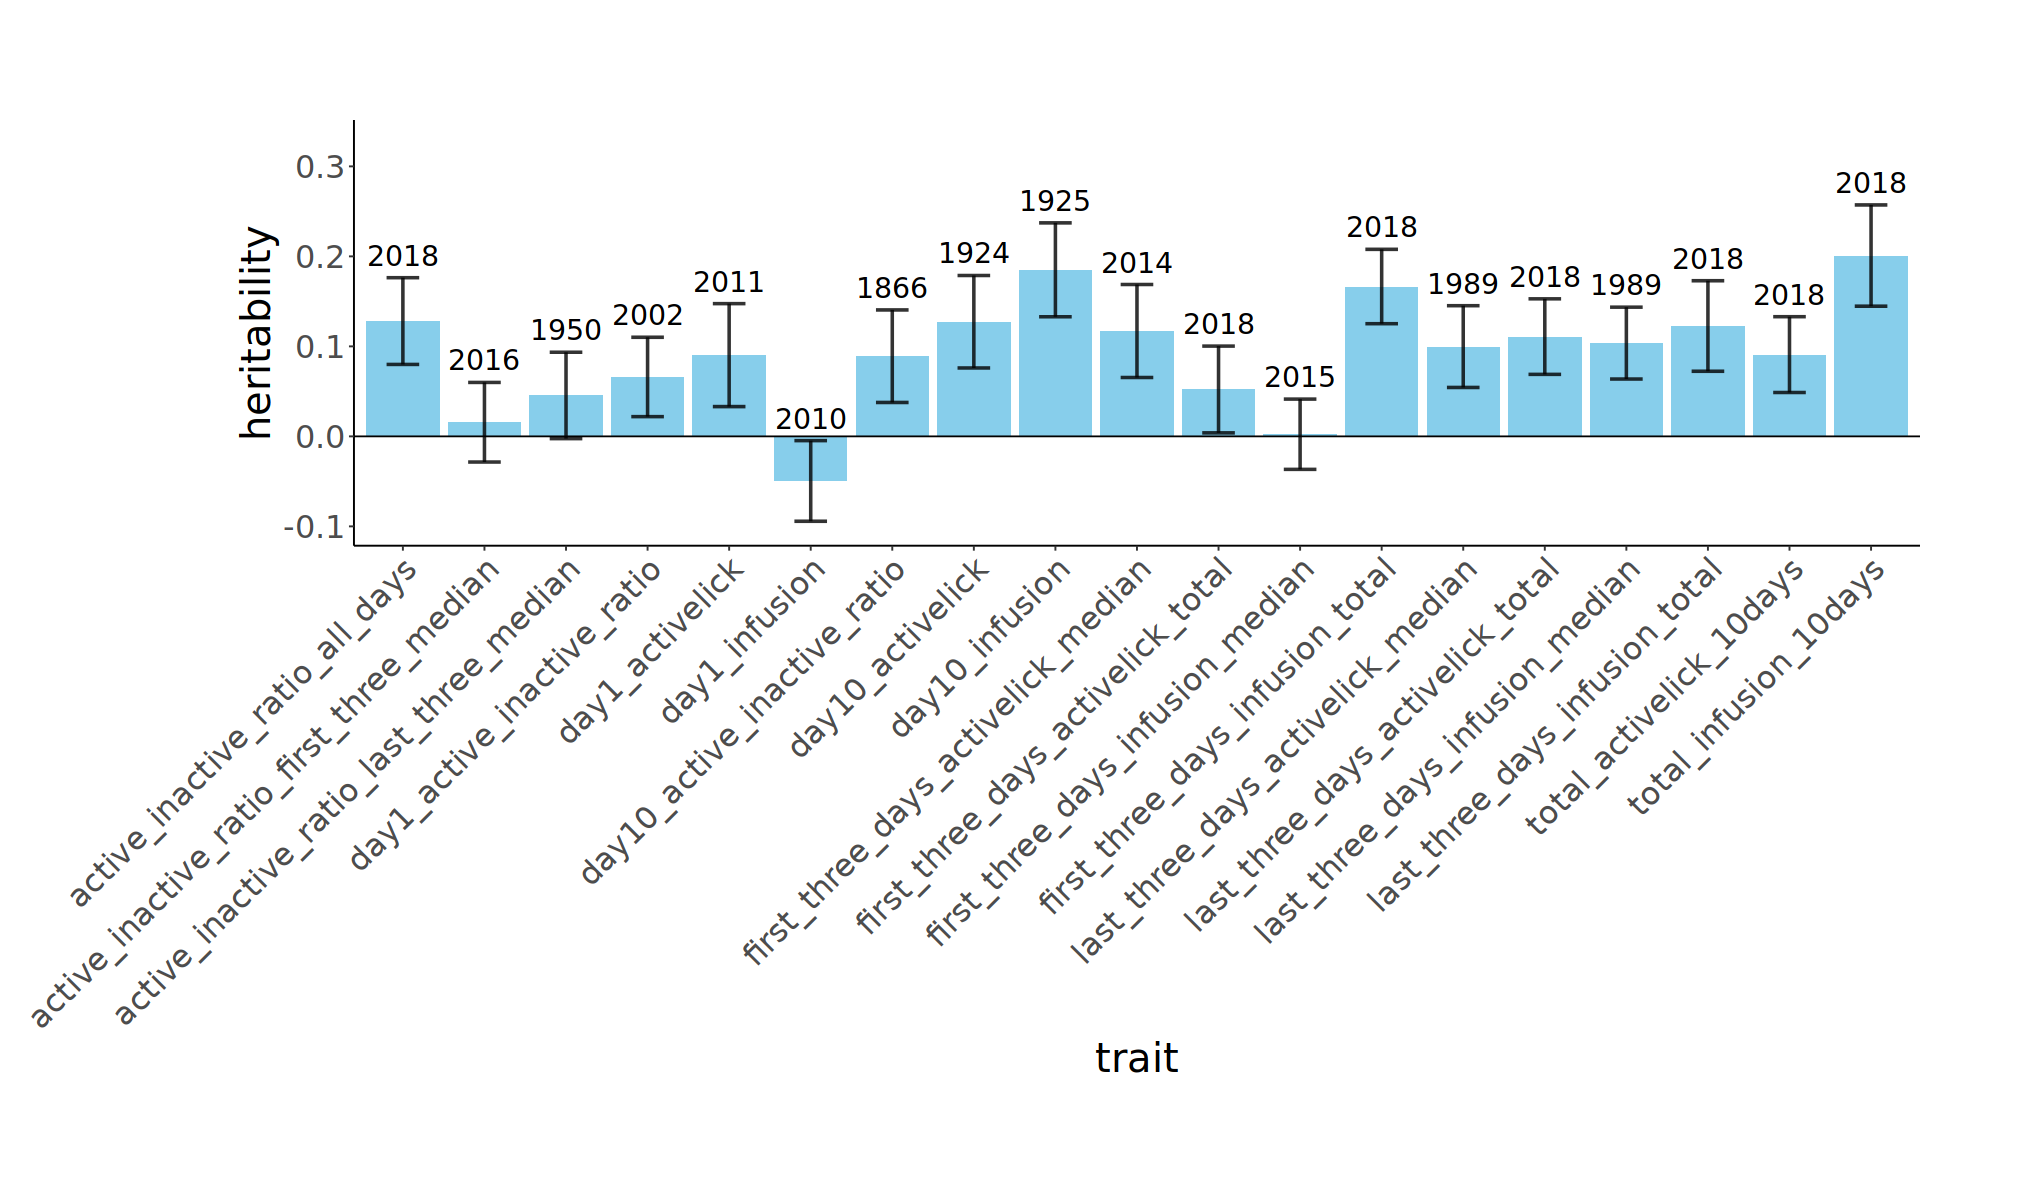

In [618]:
if (rerun){F<-"LDSC_heritability_rerun.pdf"} else {F<-"LDSC_heritability.pdf"}

options(repr.plot.width=17, repr.plot.height=10)

P=ggplot(herit_comp) +
    geom_bar( aes(x=trait, y=herit),stat='identity',fill='skyblue',alpha=1) +
    geom_errorbar( aes(x=trait, ymin=herit-herit_SE,ymax=herit+herit_SE),width=0.4, color="black", alpha=0.8, size=1) +
    geom_text(aes(label=N, y=herit+herit_SE+.025,x=trait),size=6) + 
    geom_hline(yintercept=0, 'solid','black',4)+
    ylim(-.1,0.33)+
    ylab('heritability')+
    theme_classic(base_size = 12)+
    theme(text = element_text(size = 24))+
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
    theme(plot.margin = unit(c(1,1,1,2), "inch"))
    ggsave(plot = P, filename = F, device = "pdf",scale=1,width=17,height=10)
P

Warning message:
“`geom_hline()`: Ignoring `mapping` because `yintercept` was provided.”
Warning message:
“`geom_hline()`: Ignoring `data` because `yintercept` was provided.”
Warning message in geom_hline(yintercept = 0, "solid", "black", 4):
“Ignoring unknown parameters: ``”


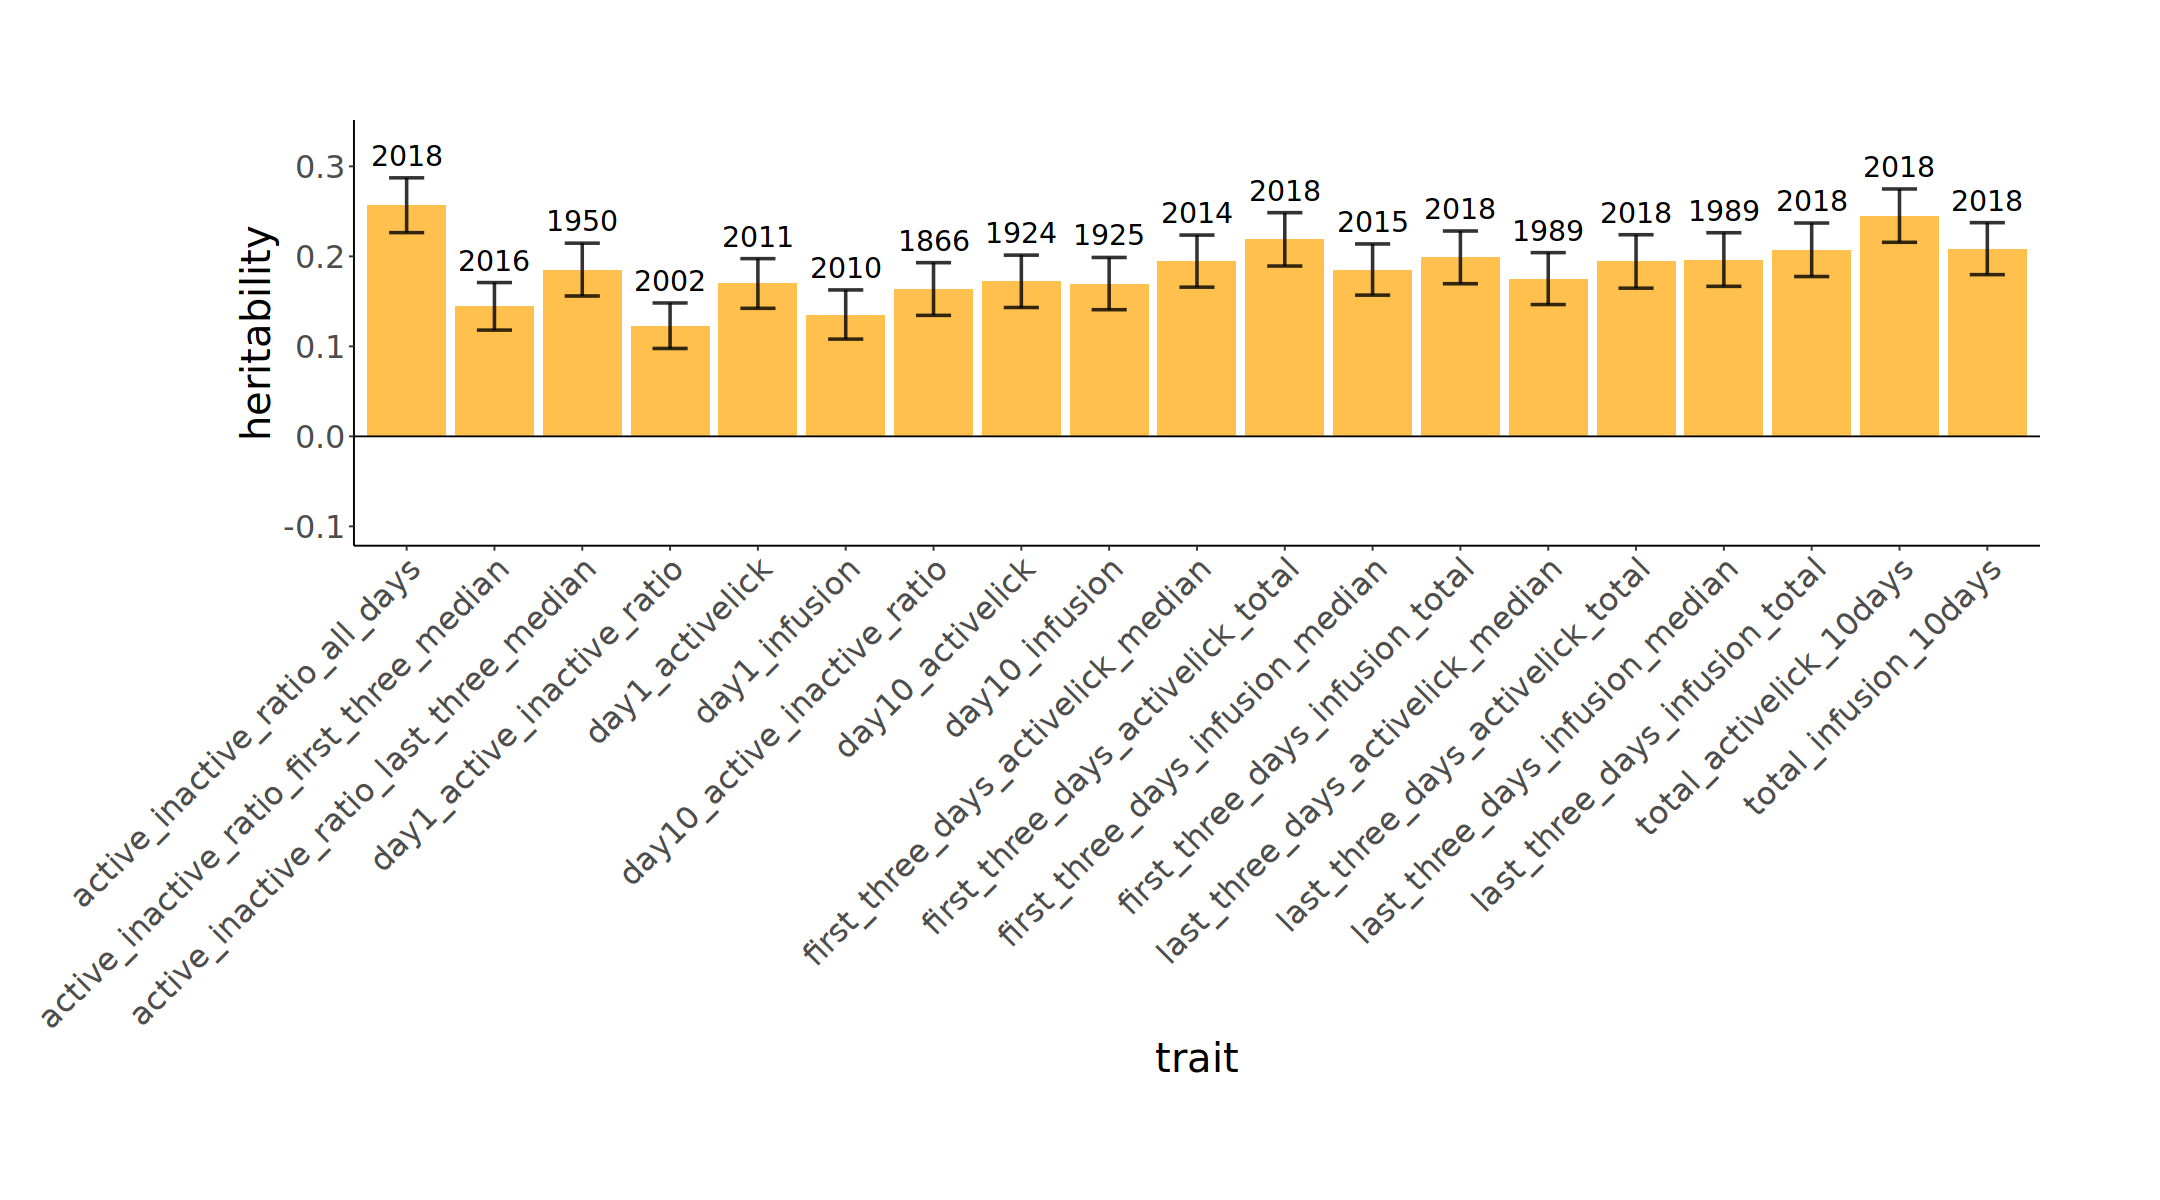

In [624]:
if (rerun){F<-"GCTA_heritability_rerun.pdf"} else {F<-"GCTA_heritability.pdf"}

options(repr.plot.width=18, repr.plot.height=10)

P=ggplot(herit_comp) +
    geom_bar( aes(x=trait, y=V.G..Vp),stat='identity',fill='orange',alpha=.7) +
    geom_errorbar( aes(x=trait, ymin=V.G..Vp-heritability_SE,ymax=V.G..Vp+heritability_SE),width=0.4, color="black", alpha=0.8, size=1) +
    geom_text(aes(label=N, y=V.G..Vp+heritability_SE+.025,x=trait),size=6) +
    geom_hline(yintercept=0, 'solid','black',4) +
    ylim(-.1,0.33)+
    ylab('heritability')+
    theme_classic(base_size = 12)+
    theme(text = element_text(size = 24))+
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
    theme(plot.margin = unit(c(1,1,1,2), "inch"))
    ggsave(plot = P, filename = F, device = "pdf",scale=1,width=17,height=10)
P

## plot as dotplot

In [18]:
heritability$test<-'LDSC'

In [19]:
herit_GCTA<-merge(nicsa_traits, herit_GCTA[c('X','V.G..Vp','heritability_SE')], by.x='file_prefix', by.y='X')
herit_GCTA$test<-'GCTA-REML'
colnames(herit_GCTA)<-colnames(heritability)

In [20]:
herit_comb<-rbind(heritability, herit_GCTA)

In [21]:
herit_comb

file_prefix,trait,N,parallel,herit,herit_SE,test
<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
regressedlr_nicsa_active_inactive_ratio_all_days,active_inactive_ratio_all_days,2018,cigday,0.128090571,0.04819601,LDSC
regressedlr_nicsa_active_inactive_ratio_first_three_median,active_inactive_ratio_first_three_median,2016,smoking initiation,0.015698350,0.04422723,LDSC
regressedlr_nicsa_active_inactive_ratio_last_three_median,active_inactive_ratio_last_three_median,1950,cigday,0.045483366,0.04797209,LDSC
regressedlr_nicsa_day1_active_inactive_ratio,day1_active_inactive_ratio,2002,smoking initiation,0.066010350,0.04408203,LDSC
regressedlr_nicsa_day1_activelick,day1_activelick,2011,smoking initiation,0.090275103,0.05720897,LDSC
regressedlr_nicsa_day1_infusion,day1_infusion,2010,smoking initiation,-0.049551580,0.04479096,LDSC
regressedlr_nicsa_day10_active_inactive_ratio,day10_active_inactive_ratio,1866,cigday,0.089053667,0.05140548,LDSC
regressedlr_nicsa_day10_activelick,day10_activelick,1924,cigday,0.127356880,0.05138480,LDSC
regressedlr_nicsa_day10_infusion,day10_infusion,1925,cigday,0.185039425,0.05217428,LDSC


Warning message:
“`geom_hline()`: Ignoring `mapping` because `yintercept` was provided.”
Warning message:
“`geom_hline()`: Ignoring `data` because `yintercept` was provided.”
Warning message in geom_hline(yintercept = 0, "solid", "black", 4):
“Ignoring unknown parameters: ``”


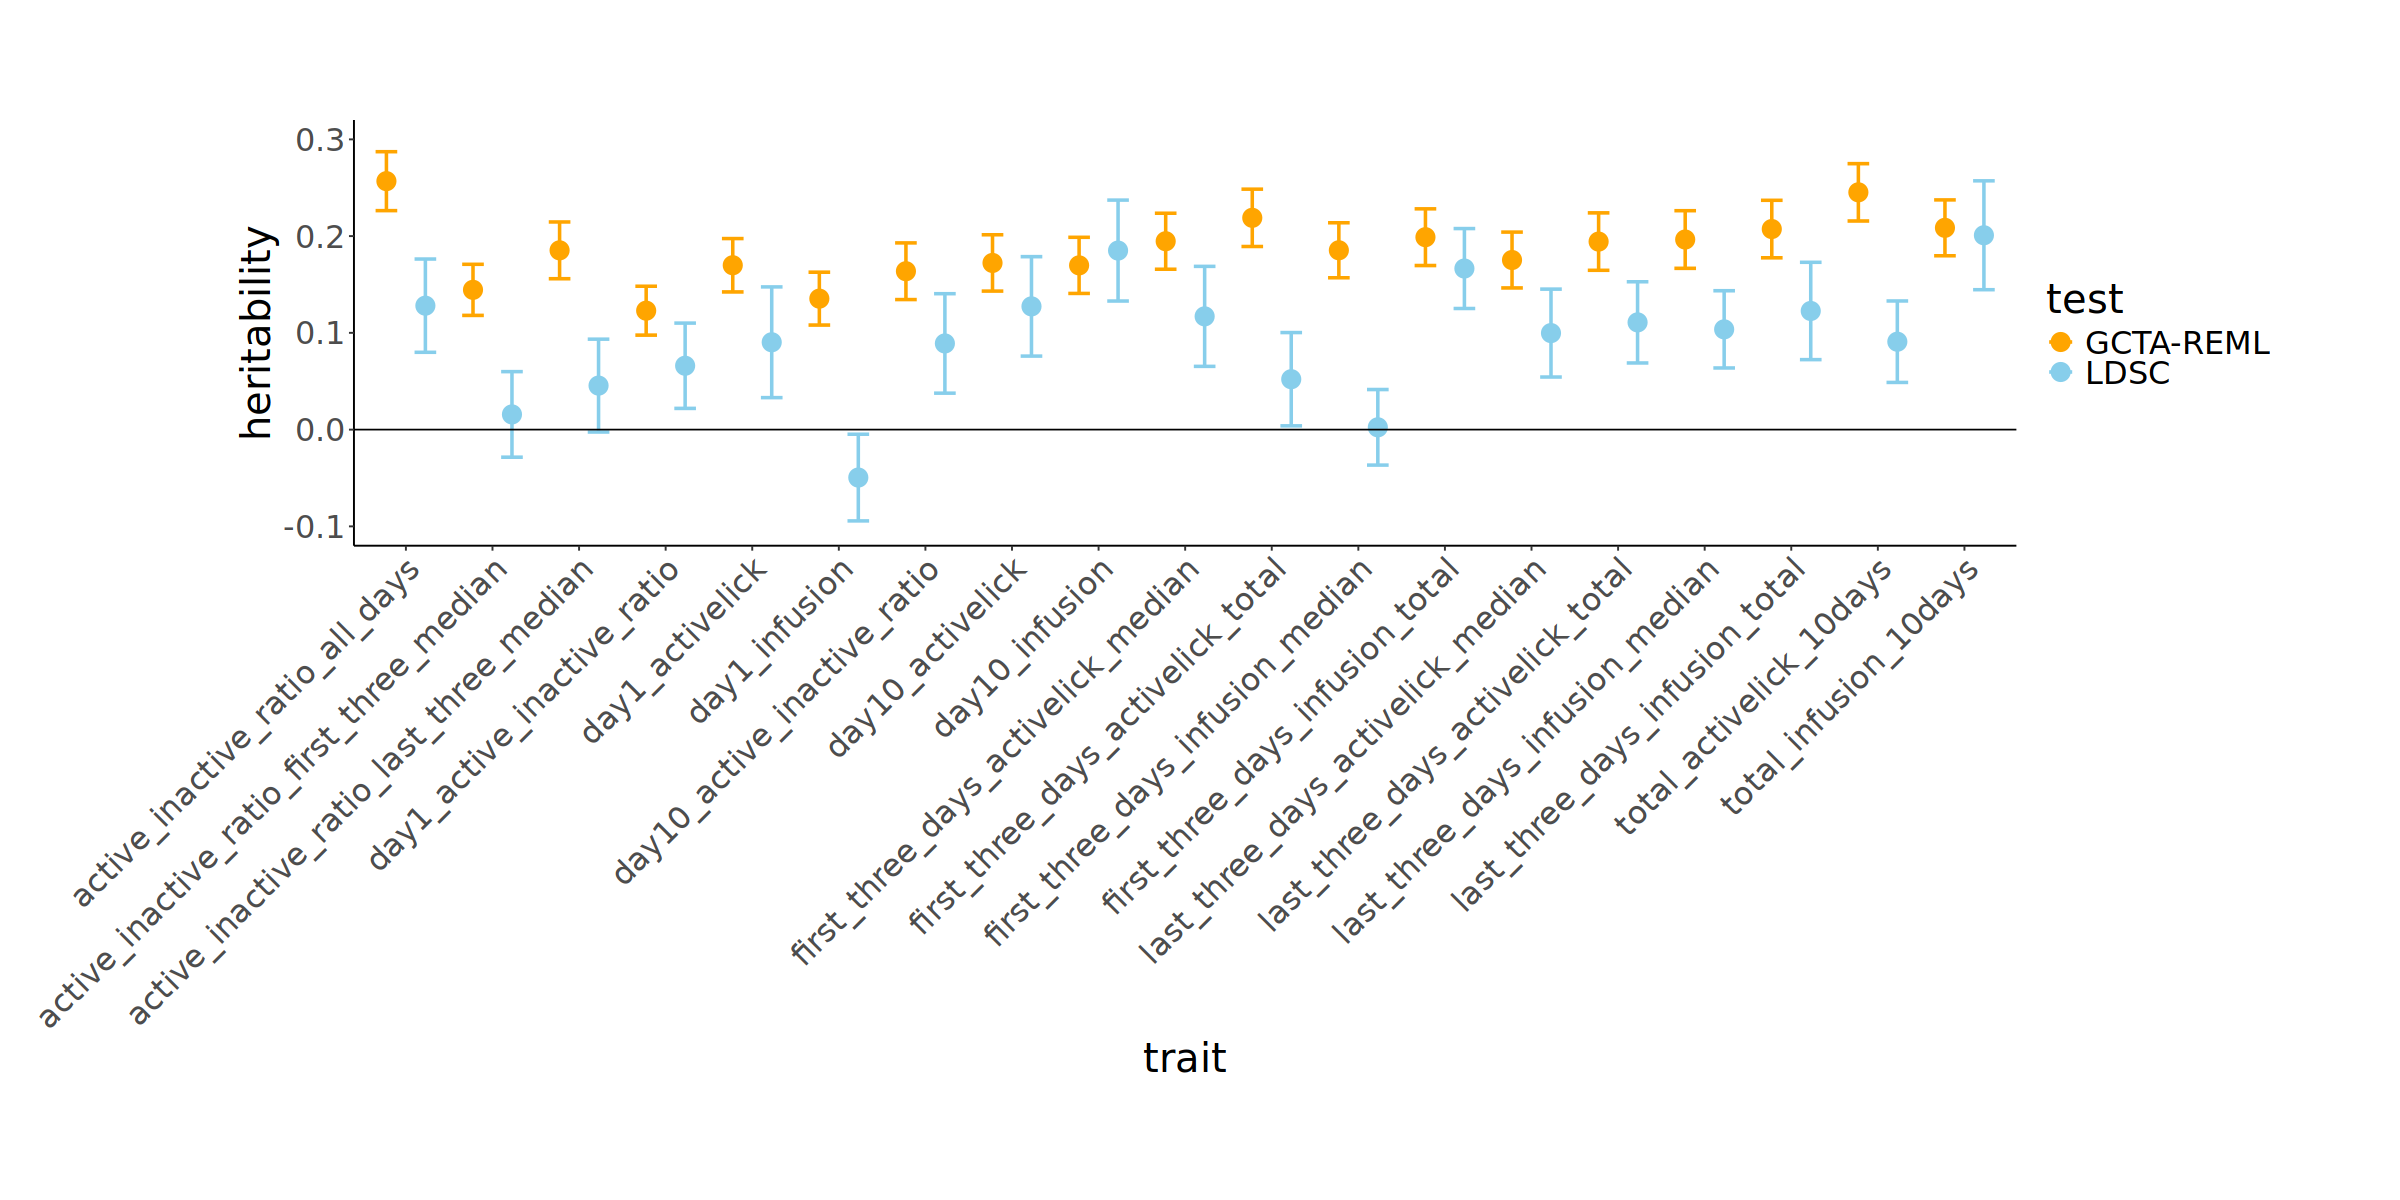

In [158]:
if (rerun){F<-"heritability_rerun.pdf"} else {F<-"heritability.pdf"}

options(repr.plot.width=20, repr.plot.height=10)

P=ggplot(data = herit_comb, 
 aes(x=trait,
     y= herit, 
     ymin=herit-herit_SE, 
     ymax=herit+herit_SE,       
     fill=test)) +
    #geom_bar(position="dodge", stat = "identity") + 
    geom_errorbar( position = position_dodge(.9), size=1, aes(colour=test), width=.5) +  
    geom_point(position=position_dodge(.9), aes(y=herit, colour=test),size=5) +
    scale_color_manual(values=c('orange','skyblue'))+
    geom_hline(yintercept=0, 'solid','black',4)+
    ylim(-.1,0.3)+
    ylab('heritability')+
    theme_classic(base_size = 12)+
    theme(text = element_text(size = 24))+
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
    theme(plot.margin = unit(c(1,1,1,2), "inch"))
    #ggsave(plot = P, filename = F, device = "pdf",scale=1,width=17,height=10)
P

Warning message:
“`geom_hline()`: Ignoring `mapping` because `yintercept` was provided.”
Warning message:
“`geom_hline()`: Ignoring `data` because `yintercept` was provided.”
Warning message in geom_hline(yintercept = 0, "solid", "black", 4):
“Ignoring unknown parameters: ``”


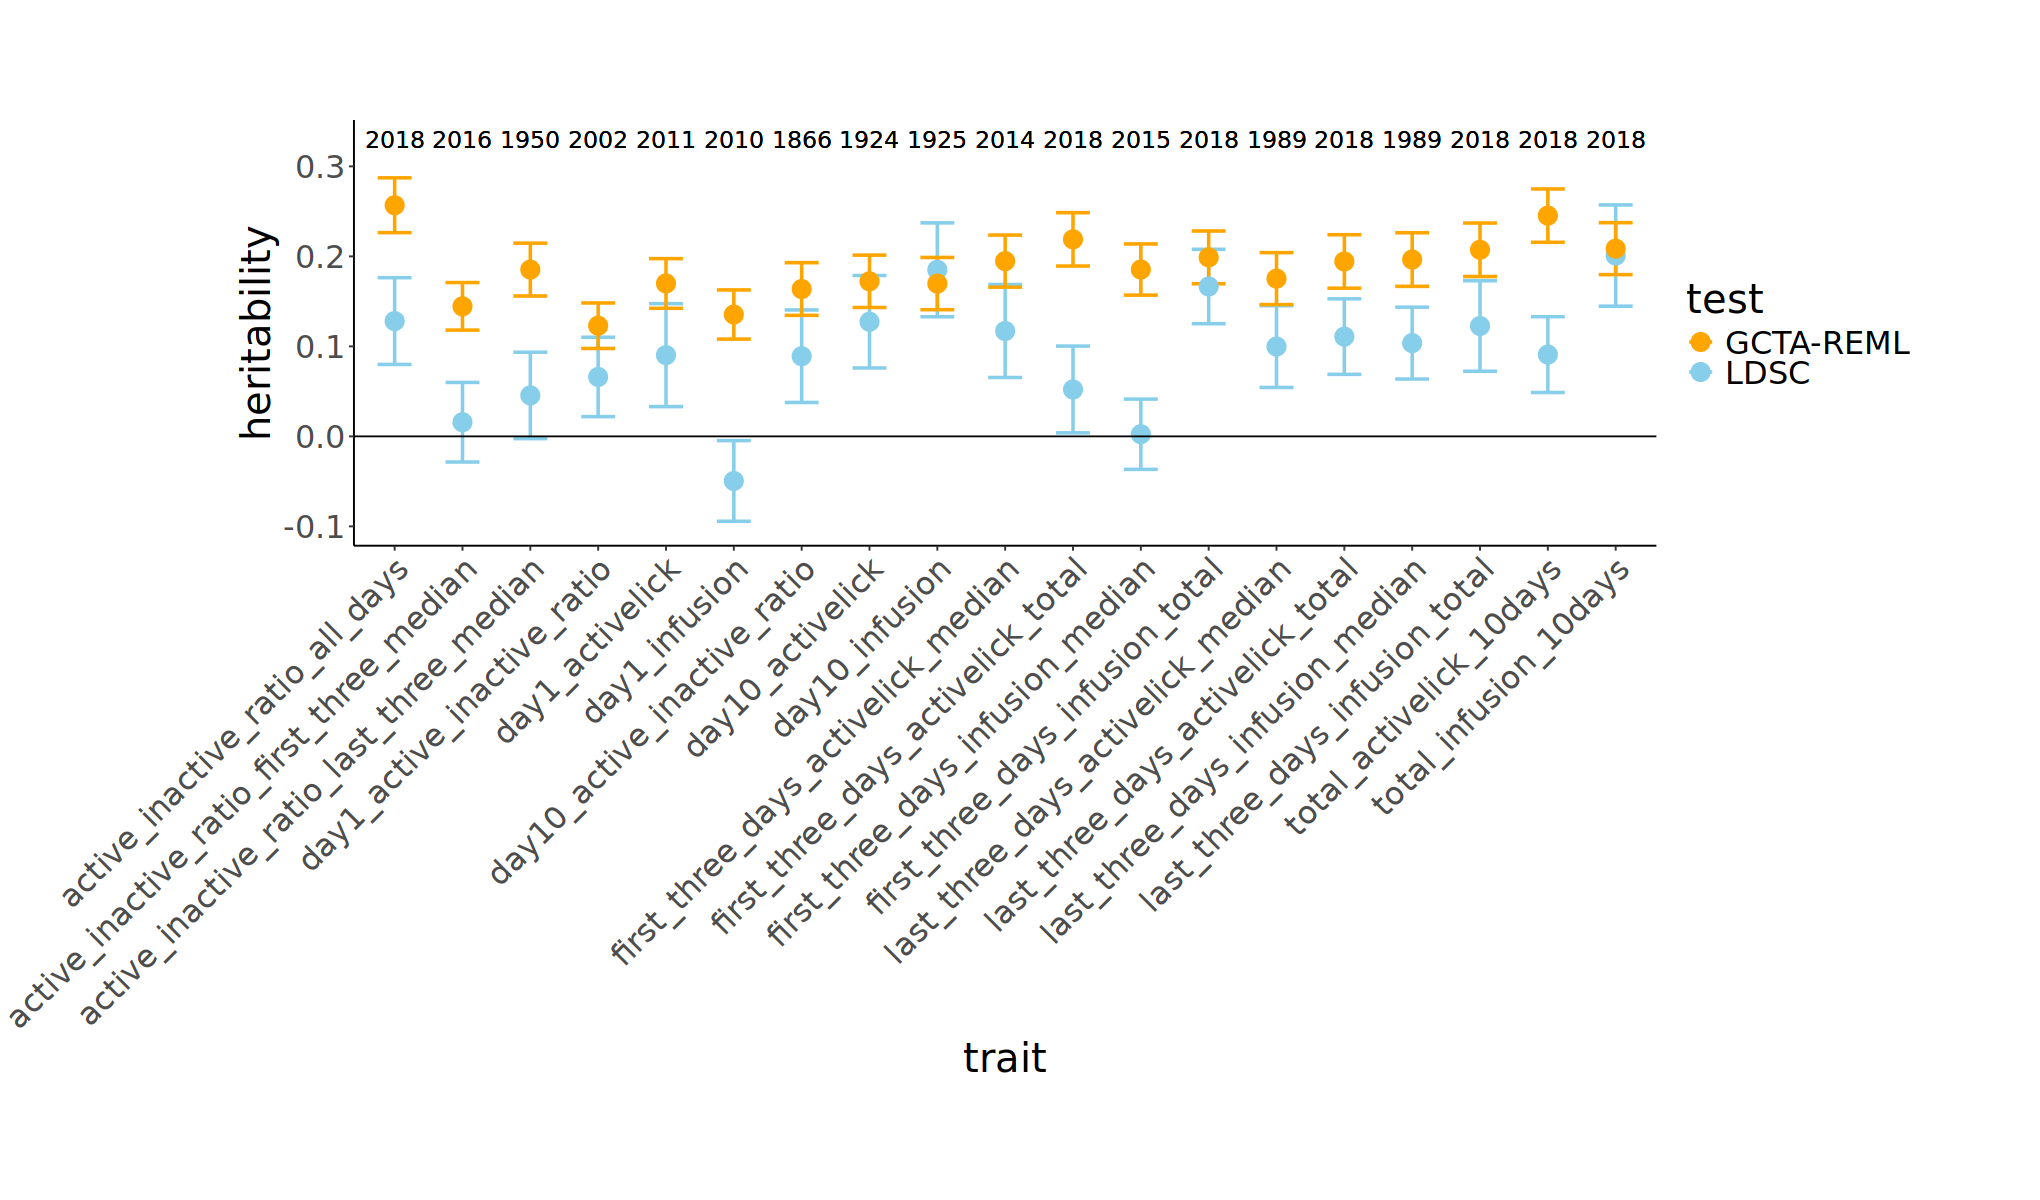

In [172]:
#### if (rerun){F<-"heritability_overlay_rerun.pdf"} else {F<-"heritability_overlap.pdf"}

options(repr.plot.width=17, repr.plot.height=10)

P=ggplot(data = herit_comb, 
 aes(x=trait,
     y= herit, 
     ymin=herit-herit_SE, 
     ymax=herit+herit_SE,       
     fill=test)) +
    #geom_bar(position="dodge", stat = "identity") + 
    geom_errorbar( position = 'identity', size=1, aes(colour=test), width=.5) +  
    geom_point(position='identity', aes(y=herit, colour=test),size=5) +
    geom_text(aes(label=N, y=.33,x=trait),size=5) + 
    scale_color_manual(values=c('orange','skyblue'))+
    geom_hline(yintercept=0, 'solid','black',4)+
    ylim(-.1,0.33)+
    ylab('heritability')+
    theme_classic(base_size = 12)+
    theme(text = element_text(size = 24))+
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
    theme(plot.margin = unit(c(1,1,1,2), "inch"))
    ggsave(plot = P, filename = F, device = "pdf",scale=1,width=17,height=10)
P

Warning message:
“`geom_hline()`: Ignoring `mapping` because `yintercept` was provided.”
Warning message:
“`geom_hline()`: Ignoring `data` because `yintercept` was provided.”
Warning message in geom_hline(yintercept = 0, "solid", "black", 4):
“Ignoring unknown parameters: ``”


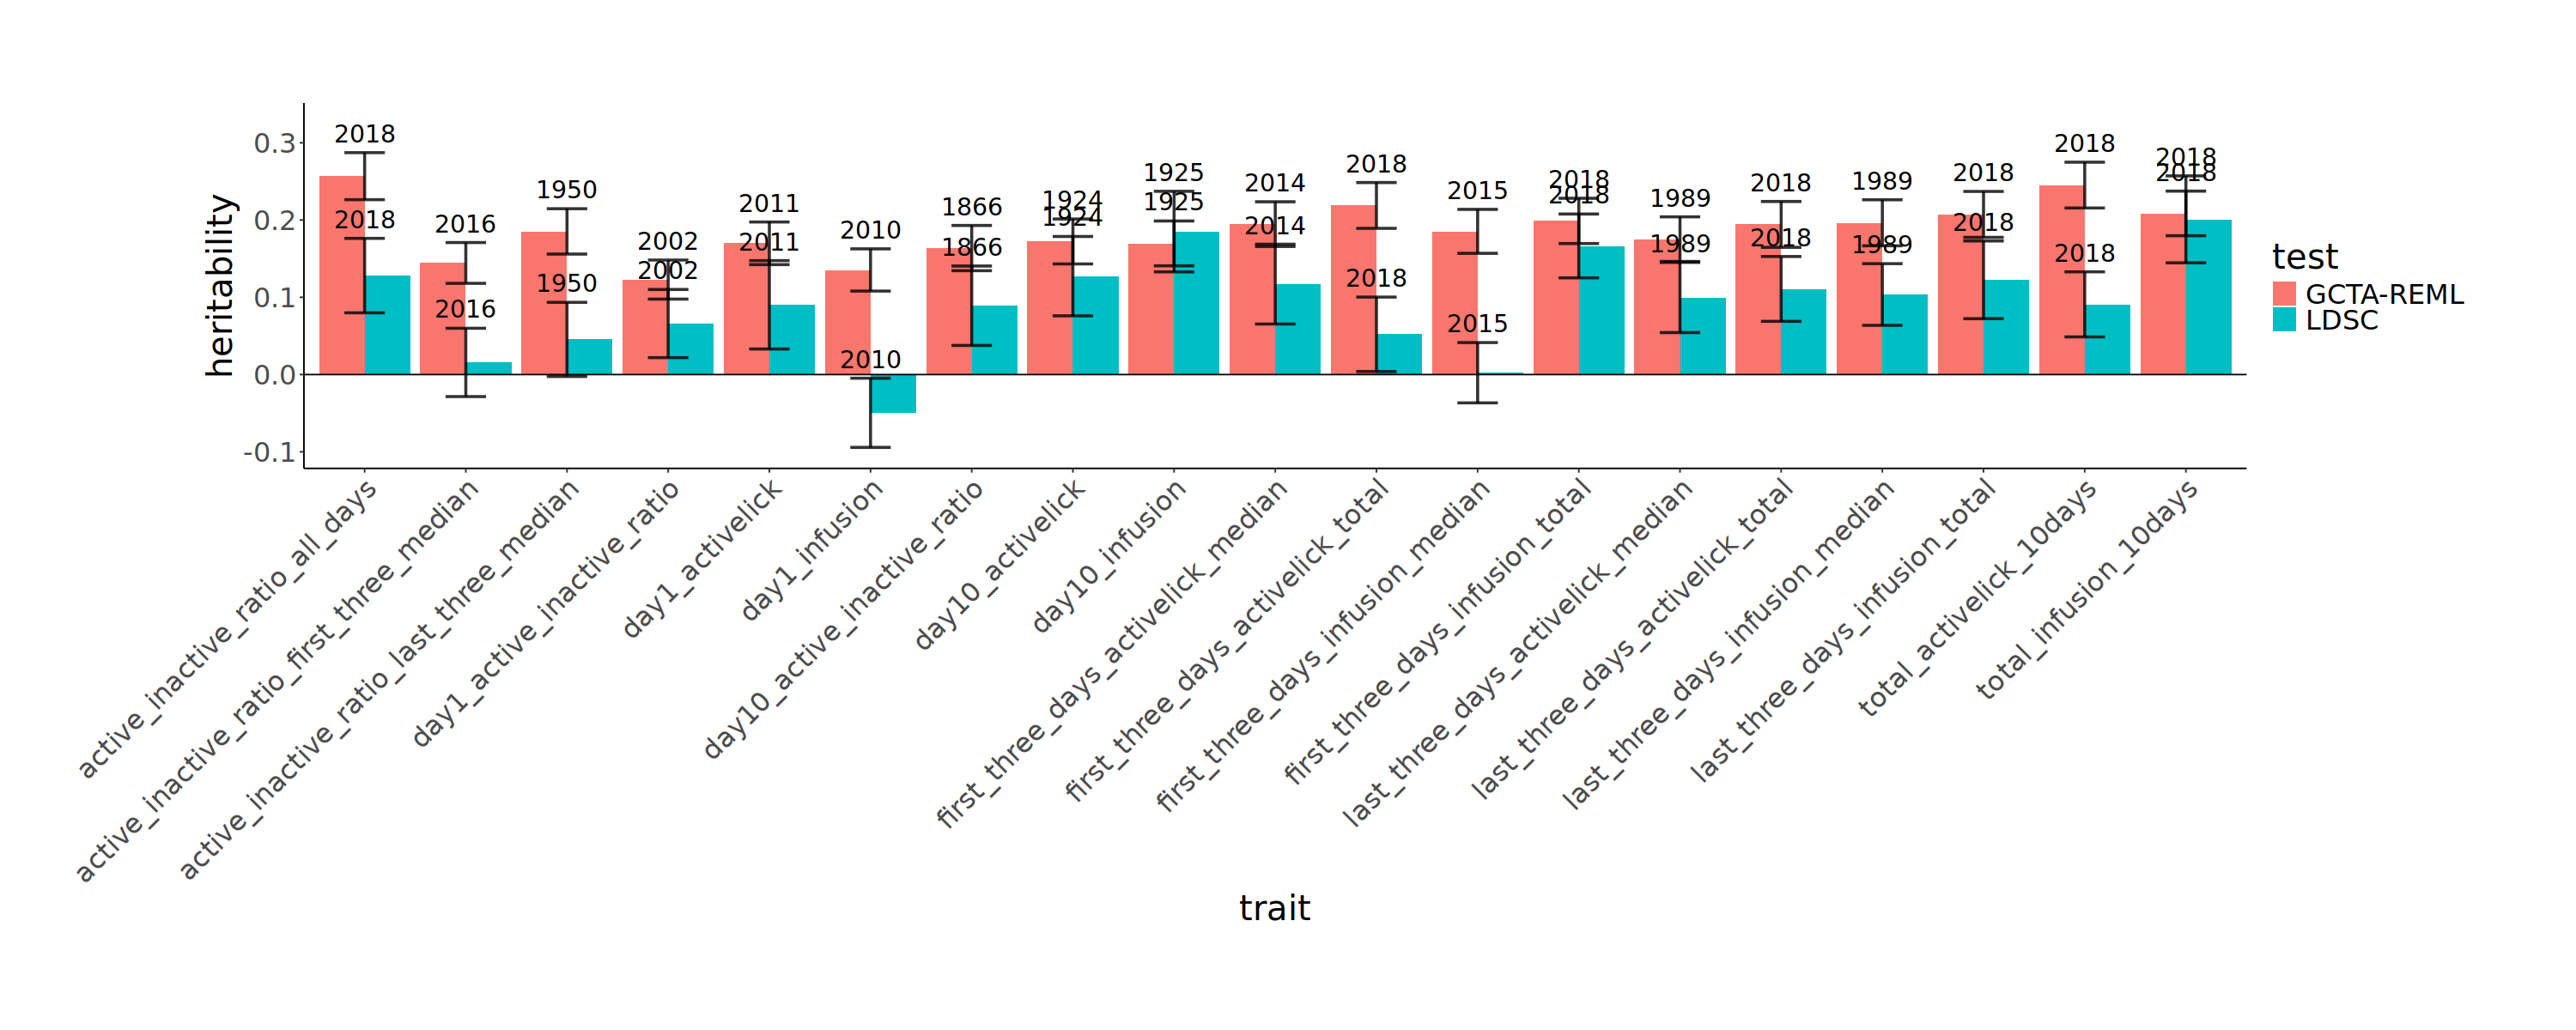

In [107]:
options(repr.plot.width=25, repr.plot.height=10)


P=ggplot(herit_comb) +
    geom_bar( aes(x=trait, y=herit,fill=test),stat='identity',alpha=1,position=position_dodge()) +
    geom_errorbar( aes(x=trait, ymin=herit-herit_SE,ymax=herit+herit_SE),stat='identity',width=0.4, color="black", alpha=0.8, size=1,position=position_dodge()) +
    geom_text(aes(label=N, y=herit+herit_SE+.025,x=trait),size=6) + 
    geom_hline(yintercept=0, 'solid','black',4)+
    ylim(-.1,0.33)+
    ylab('heritability')+
    theme_classic(base_size = 12)+
    theme(text = element_text(size = 24))+
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
    theme(plot.margin = unit(c(1,1,1,2), "inch"))
    ggsave(plot = P, filename = F, device = "pdf",scale=1,width=17,height=10)
P

# plot genetic correlation

## LDSC genetic correlation

In [22]:
gencor_LDSC_m<-melt(gencor_LDSC)

## generate GCTA correlation matrix

In [23]:
corr_matrix_gen_GCTA=read.table('nicsa_gwas/genetic_correlation_matrix_justgenetic.csv',sep=',',header=TRUE)
corr_matrix_gen_GCTA<-data.frame(corr_matrix_gen_GCTA)
rownames(corr_matrix_gen_GCTA)<-corr_matrix_gen_GCTA$X
corr_matrix_gen_GCTA <- subset(corr_matrix_gen_GCTA, select = -c(X) )
colnames(corr_matrix_gen_GCTA)<-substring(colnames(corr_matrix_gen_GCTA), first = 7)
rownames(corr_matrix_gen_GCTA)<-substring(rownames(corr_matrix_gen_GCTA), first = 7)

In [24]:
corr_matrix_gen_GCTA<-corr_matrix_gen_GCTA[rownames(corr_matrix_gen_GCTA) %in% nicsa_traits$trait]
corr_matrix_gen_GCTA<-corr_matrix_gen_GCTA[colnames(corr_matrix_gen_GCTA) %in% nicsa_traits$trait]

In [25]:
#take only the value, remove the error, convert to numeric
corr_matrix_gen_GCTA <- corr_matrix_gen_GCTA %>% mutate(across(everything(), ~sapply(strsplit(., "\\+"), function(x) as.numeric(x[1]))))
#make into data matrix for melting
gencor_GCTA<-data.matrix(corr_matrix_gen_GCTA)
#melt matrix
gencor_GCTA_m<-melt(gencor_GCTA)

In [26]:
gencor_GCTA_m$comp=paste(gencor_GCTA_m$Var1,gencor_GCTA_m$Var2)
names(gencor_GCTA_m)[names(gencor_GCTA_m) == 'value']<-'corr_GCTA' 
gencor_LDSC_m$comp=paste(gencor_LDSC_m$Var1,gencor_LDSC_m$Var2)
names(gencor_LDSC_m)[names(gencor_LDSC_m) == 'value']<-'corr_LSDC'
gencor=merge(gencor_LDSC_m,gencor_GCTA_m[c('comp','corr_GCTA')],by='comp')

In [27]:
nicsa_traits[nicsa_traits$parallel!='smoking initiation',]

,trait,file_prefix,N,parallel
,<chr>,<chr>,<int>,<chr>
9,day10_activelick,regressedlr_nicsa_day10_activelick,1924,cigday
10,day10_active_inactive_ratio,regressedlr_nicsa_day10_active_inactive_ratio,1866,cigday
11,day10_infusion,regressedlr_nicsa_day10_infusion,1925,cigday
12,active_inactive_ratio_last_three_median,regressedlr_nicsa_active_inactive_ratio_last_three_median,1950,cigday
13,last_three_days_activelick_median,regressedlr_nicsa_last_three_days_activelick_median,1989,cigday
14,last_three_days_activelick_total,regressedlr_nicsa_last_three_days_activelick_total,2018,cigday
15,last_three_days_infusion_median,regressedlr_nicsa_last_three_days_infusion_median,1989,cigday
16,last_three_days_infusion_total,regressedlr_nicsa_last_three_days_infusion_total,2018,cigday
17,total_activelick_10days,regressedlr_nicsa_total_activelick_10days,2018,cigday


In [28]:
nicsa_traits$parallel

[1] "smoking initiation" "smoking initiation" "smoking initiation"
 [4] "smoking initiation" "smoking initiation" "smoking initiation"
 [7] "smoking initiation" "smoking initiation" "cigday"            
[10] "cigday"             "cigday"             "cigday"            
[13] "cigday"             "cigday"             "cigday"            
[16] "cigday"             "cigday"             "cigday"            
[19] "cigday"

In [29]:
gencor_smkinit=gencor[((gencor$Var1 %in% nicsa_traits[nicsa_traits$parallel=='smoking initiation',]$trait) & (gencor$Var2 %in% nicsa_traits[nicsa_traits$parallel=='smoking initiation',]$trait)),]

In [30]:
gencor_cigday=gencor[((gencor$Var1 %in% nicsa_traits[nicsa_traits$parallel!='smoking initiation',]$trait) & (gencor$Var2 %in% nicsa_traits[nicsa_traits$parallel!='smoking initiation',]$trait)),]

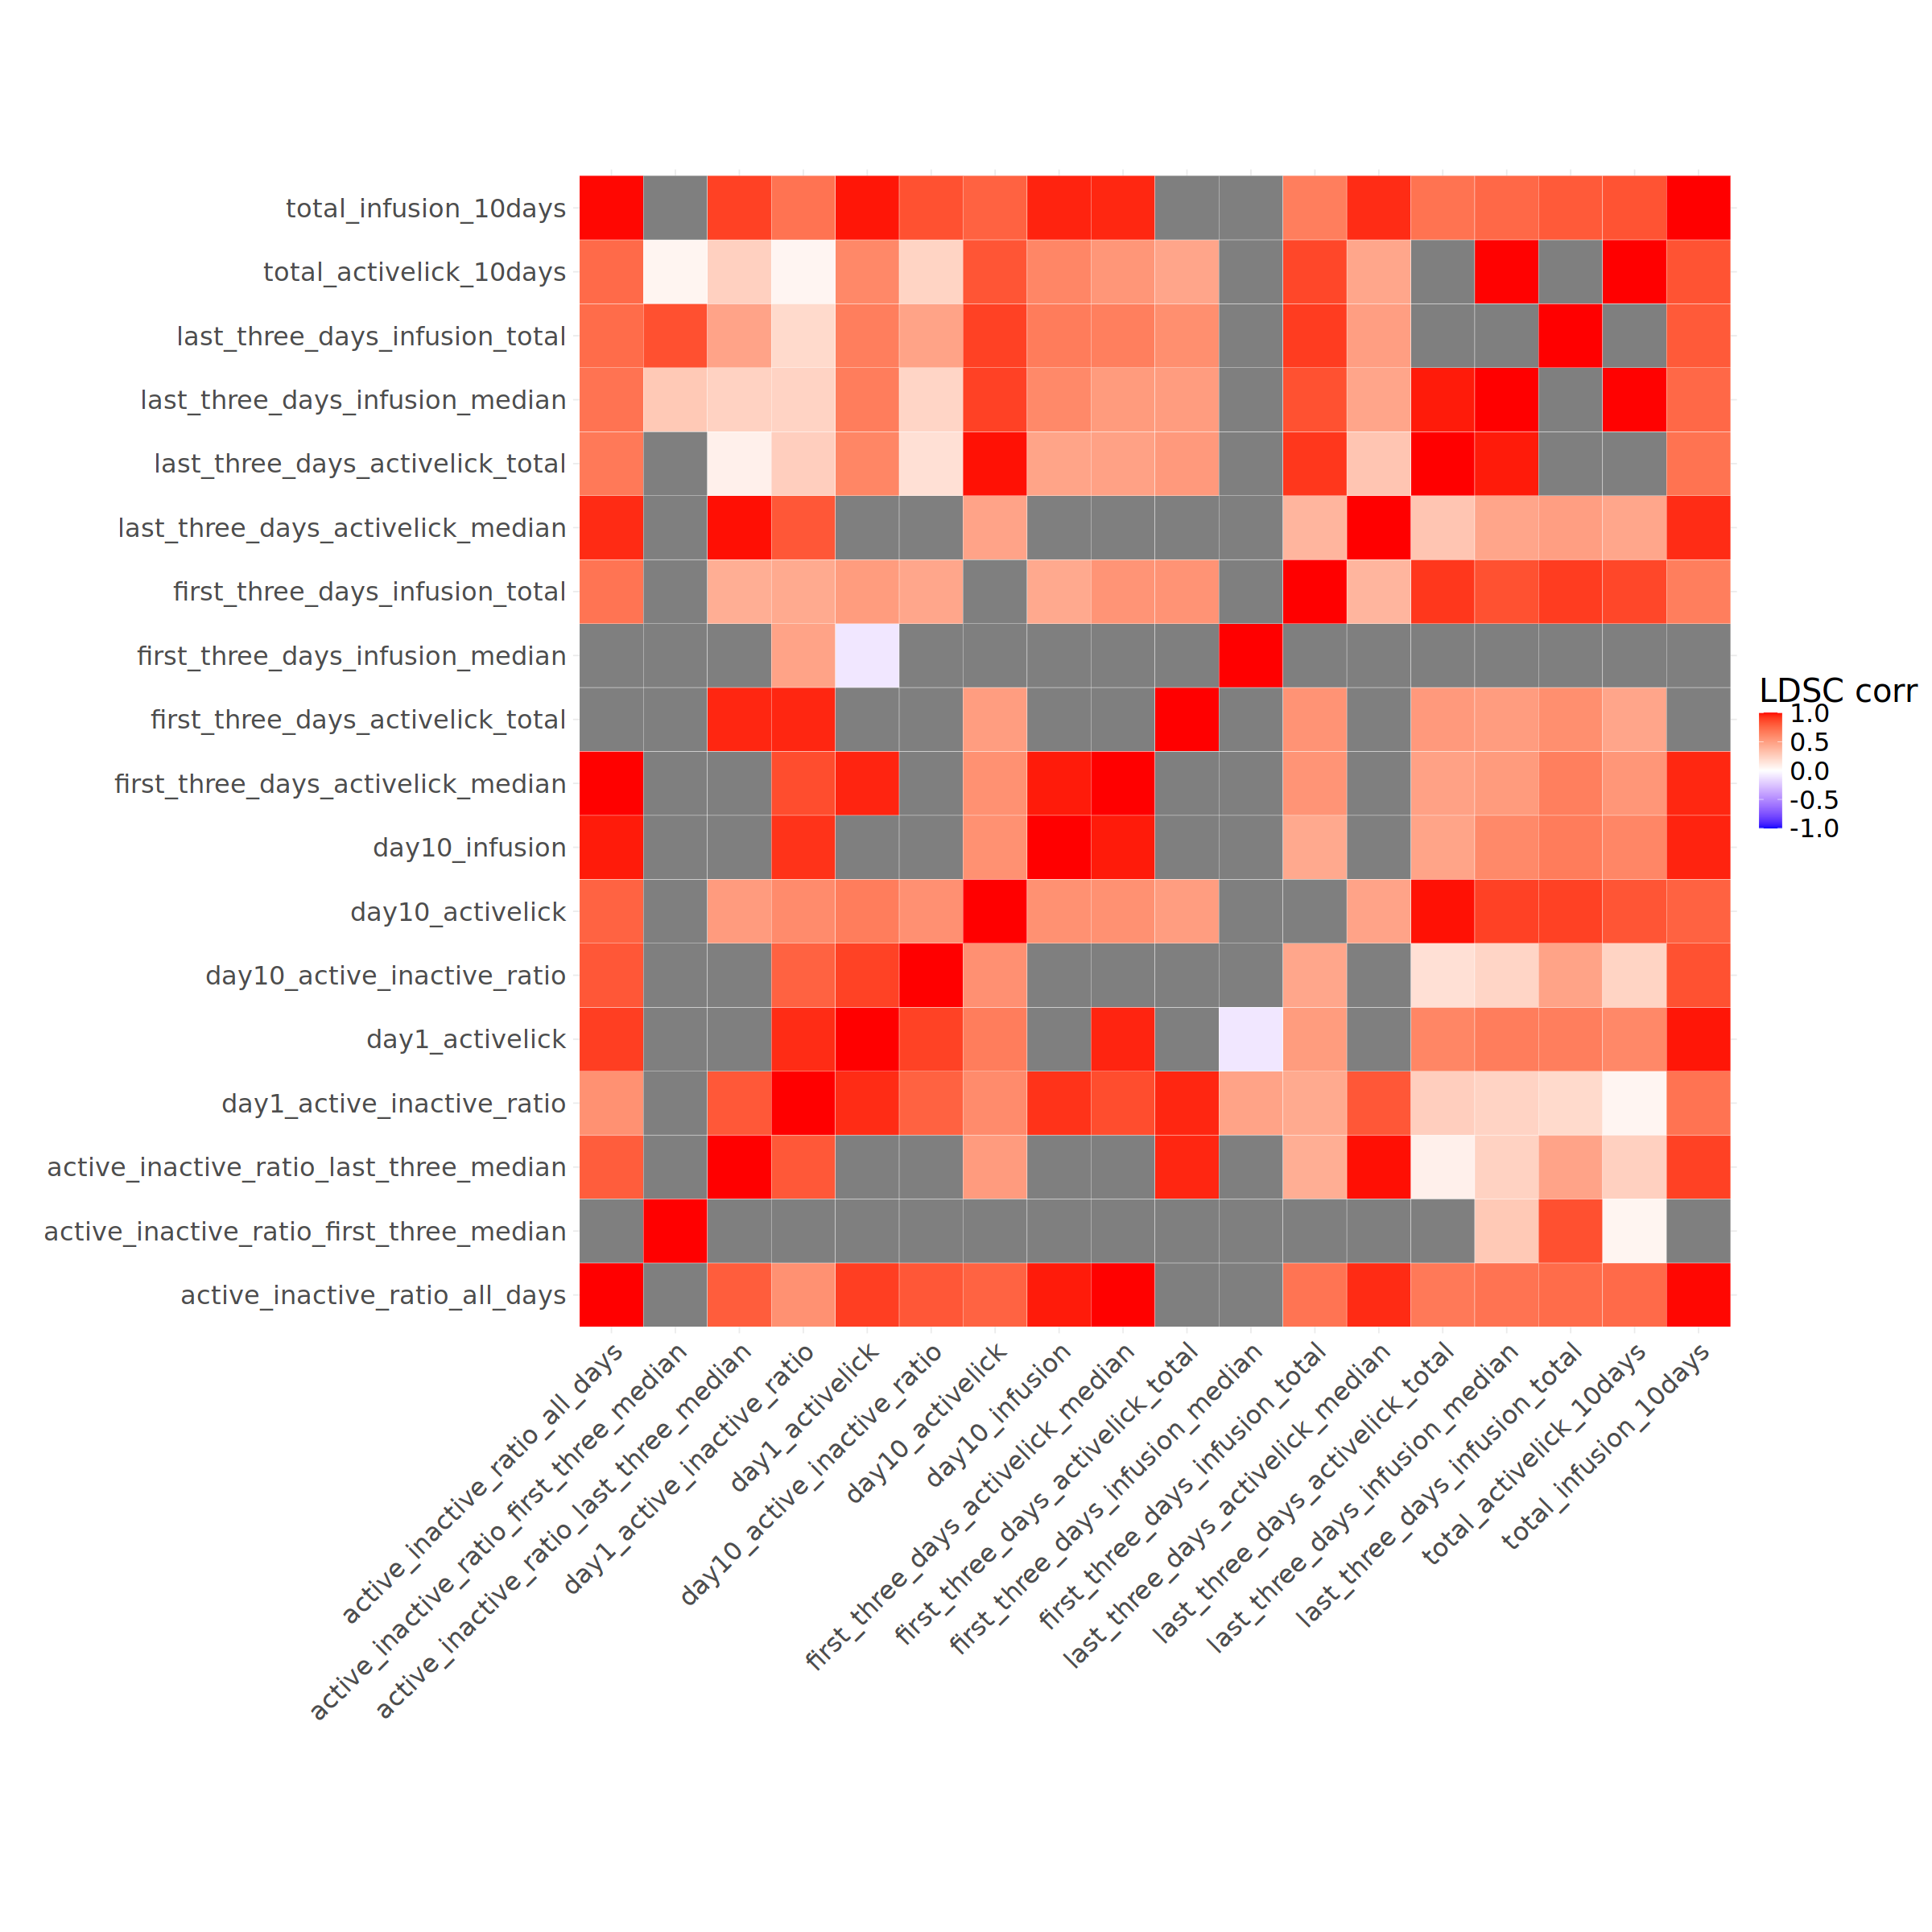

In [582]:
#LDSC correlation
if (rerun){F<-"LDSC_gen_correlation_rerun.pdf"} else {F<-"LDSC_gen_correlation.pdf"}
options(repr.plot.width=20, repr.plot.height=20)
P<-ggplot(data = gencor, aes(x=Var1, y=Var2, fill=corr_LSDC)) + 
  geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab",name='LDSC corr') +
  theme_minimal()+ 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
    theme(text = element_text(size = 24,colour='black'))+
    coord_equal()+
    xlab('')+
    ylab('')
ggsave(plot = P, filename = F, device = "pdf",scale=1,width=17,height=10)
P

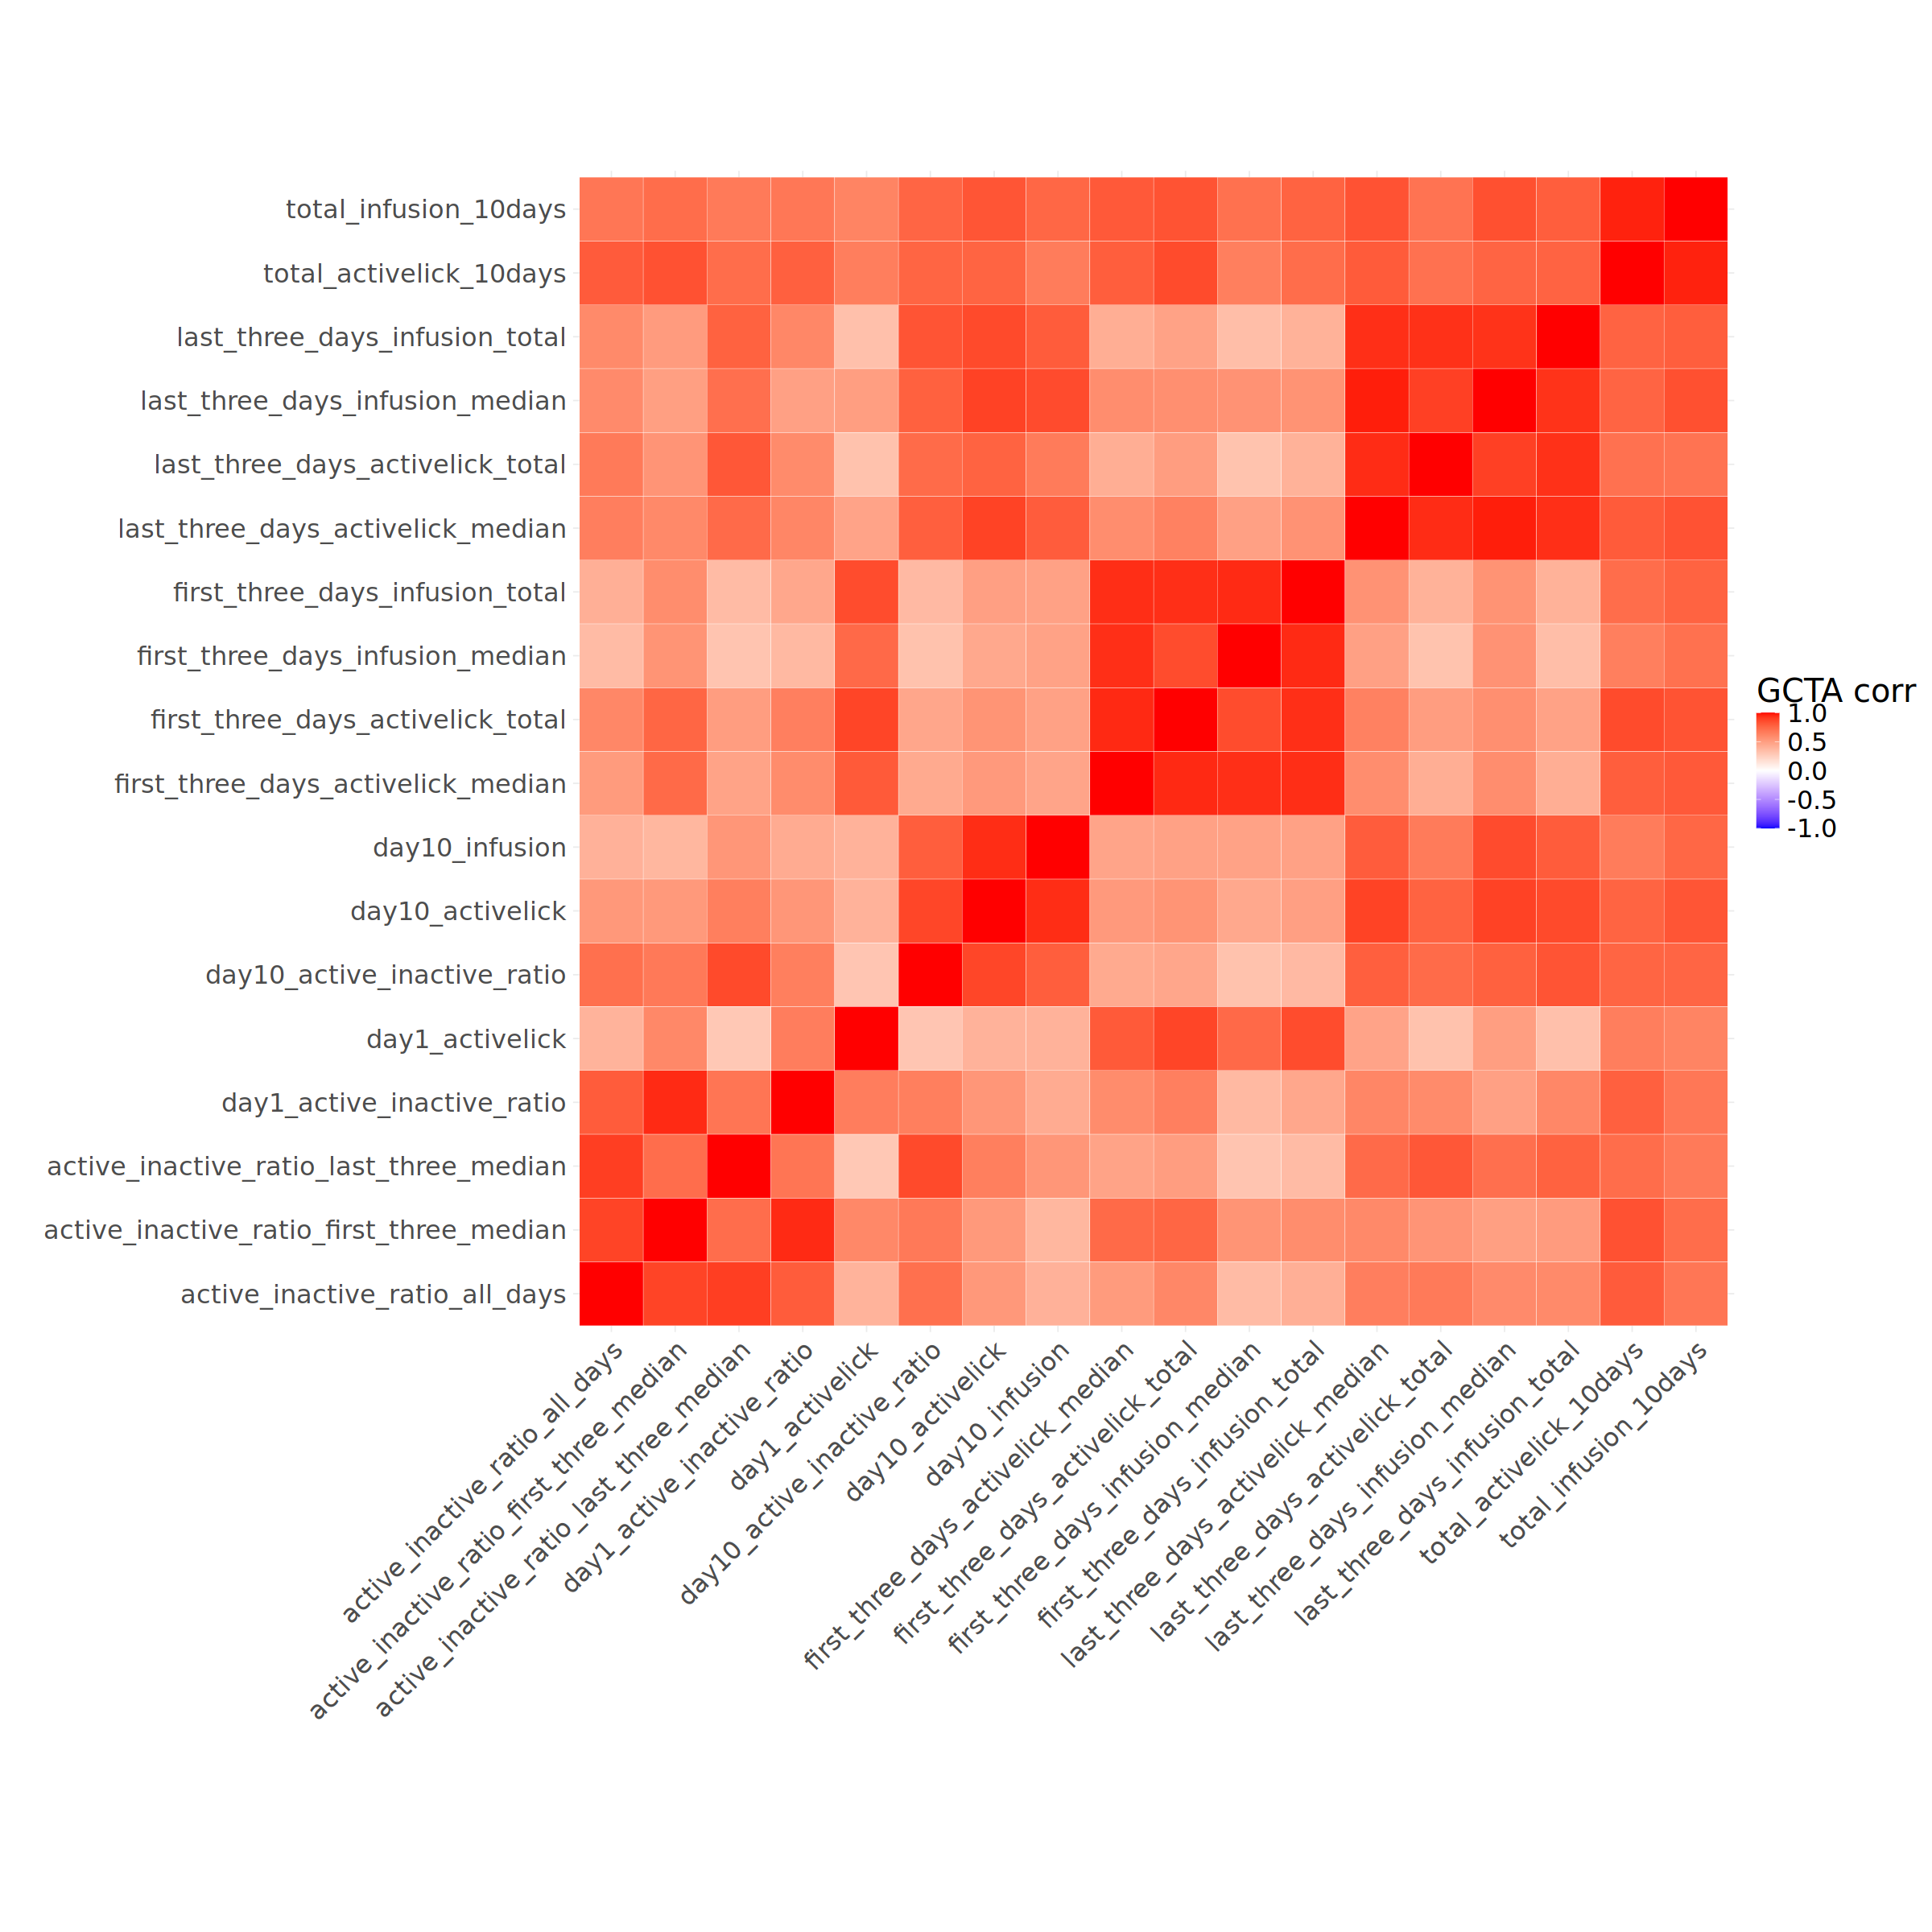

In [583]:
if (rerun){F<-"GCTA_gen_correlation_rerun.pdf"} else {F<-"GCTA_gen_correlation.pdf"}
options(repr.plot.width=20, repr.plot.height=20)
P<-ggplot(data = gencor, aes(x=Var1, y=Var2, fill=corr_GCTA)) + 
  geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab",name='GCTA corr') +
  theme_minimal()+ 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
    theme(text = element_text(size = 24,colour='black'))+
    coord_equal()+
    xlab('')+
    ylab('')
ggsave(plot = P, filename = F, device = "pdf",scale=1,width=17,height=10)
P

In [64]:
summary(gencor$corr_GCTA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1524  0.4875  0.6614  0.6512  0.8057  1.0000 

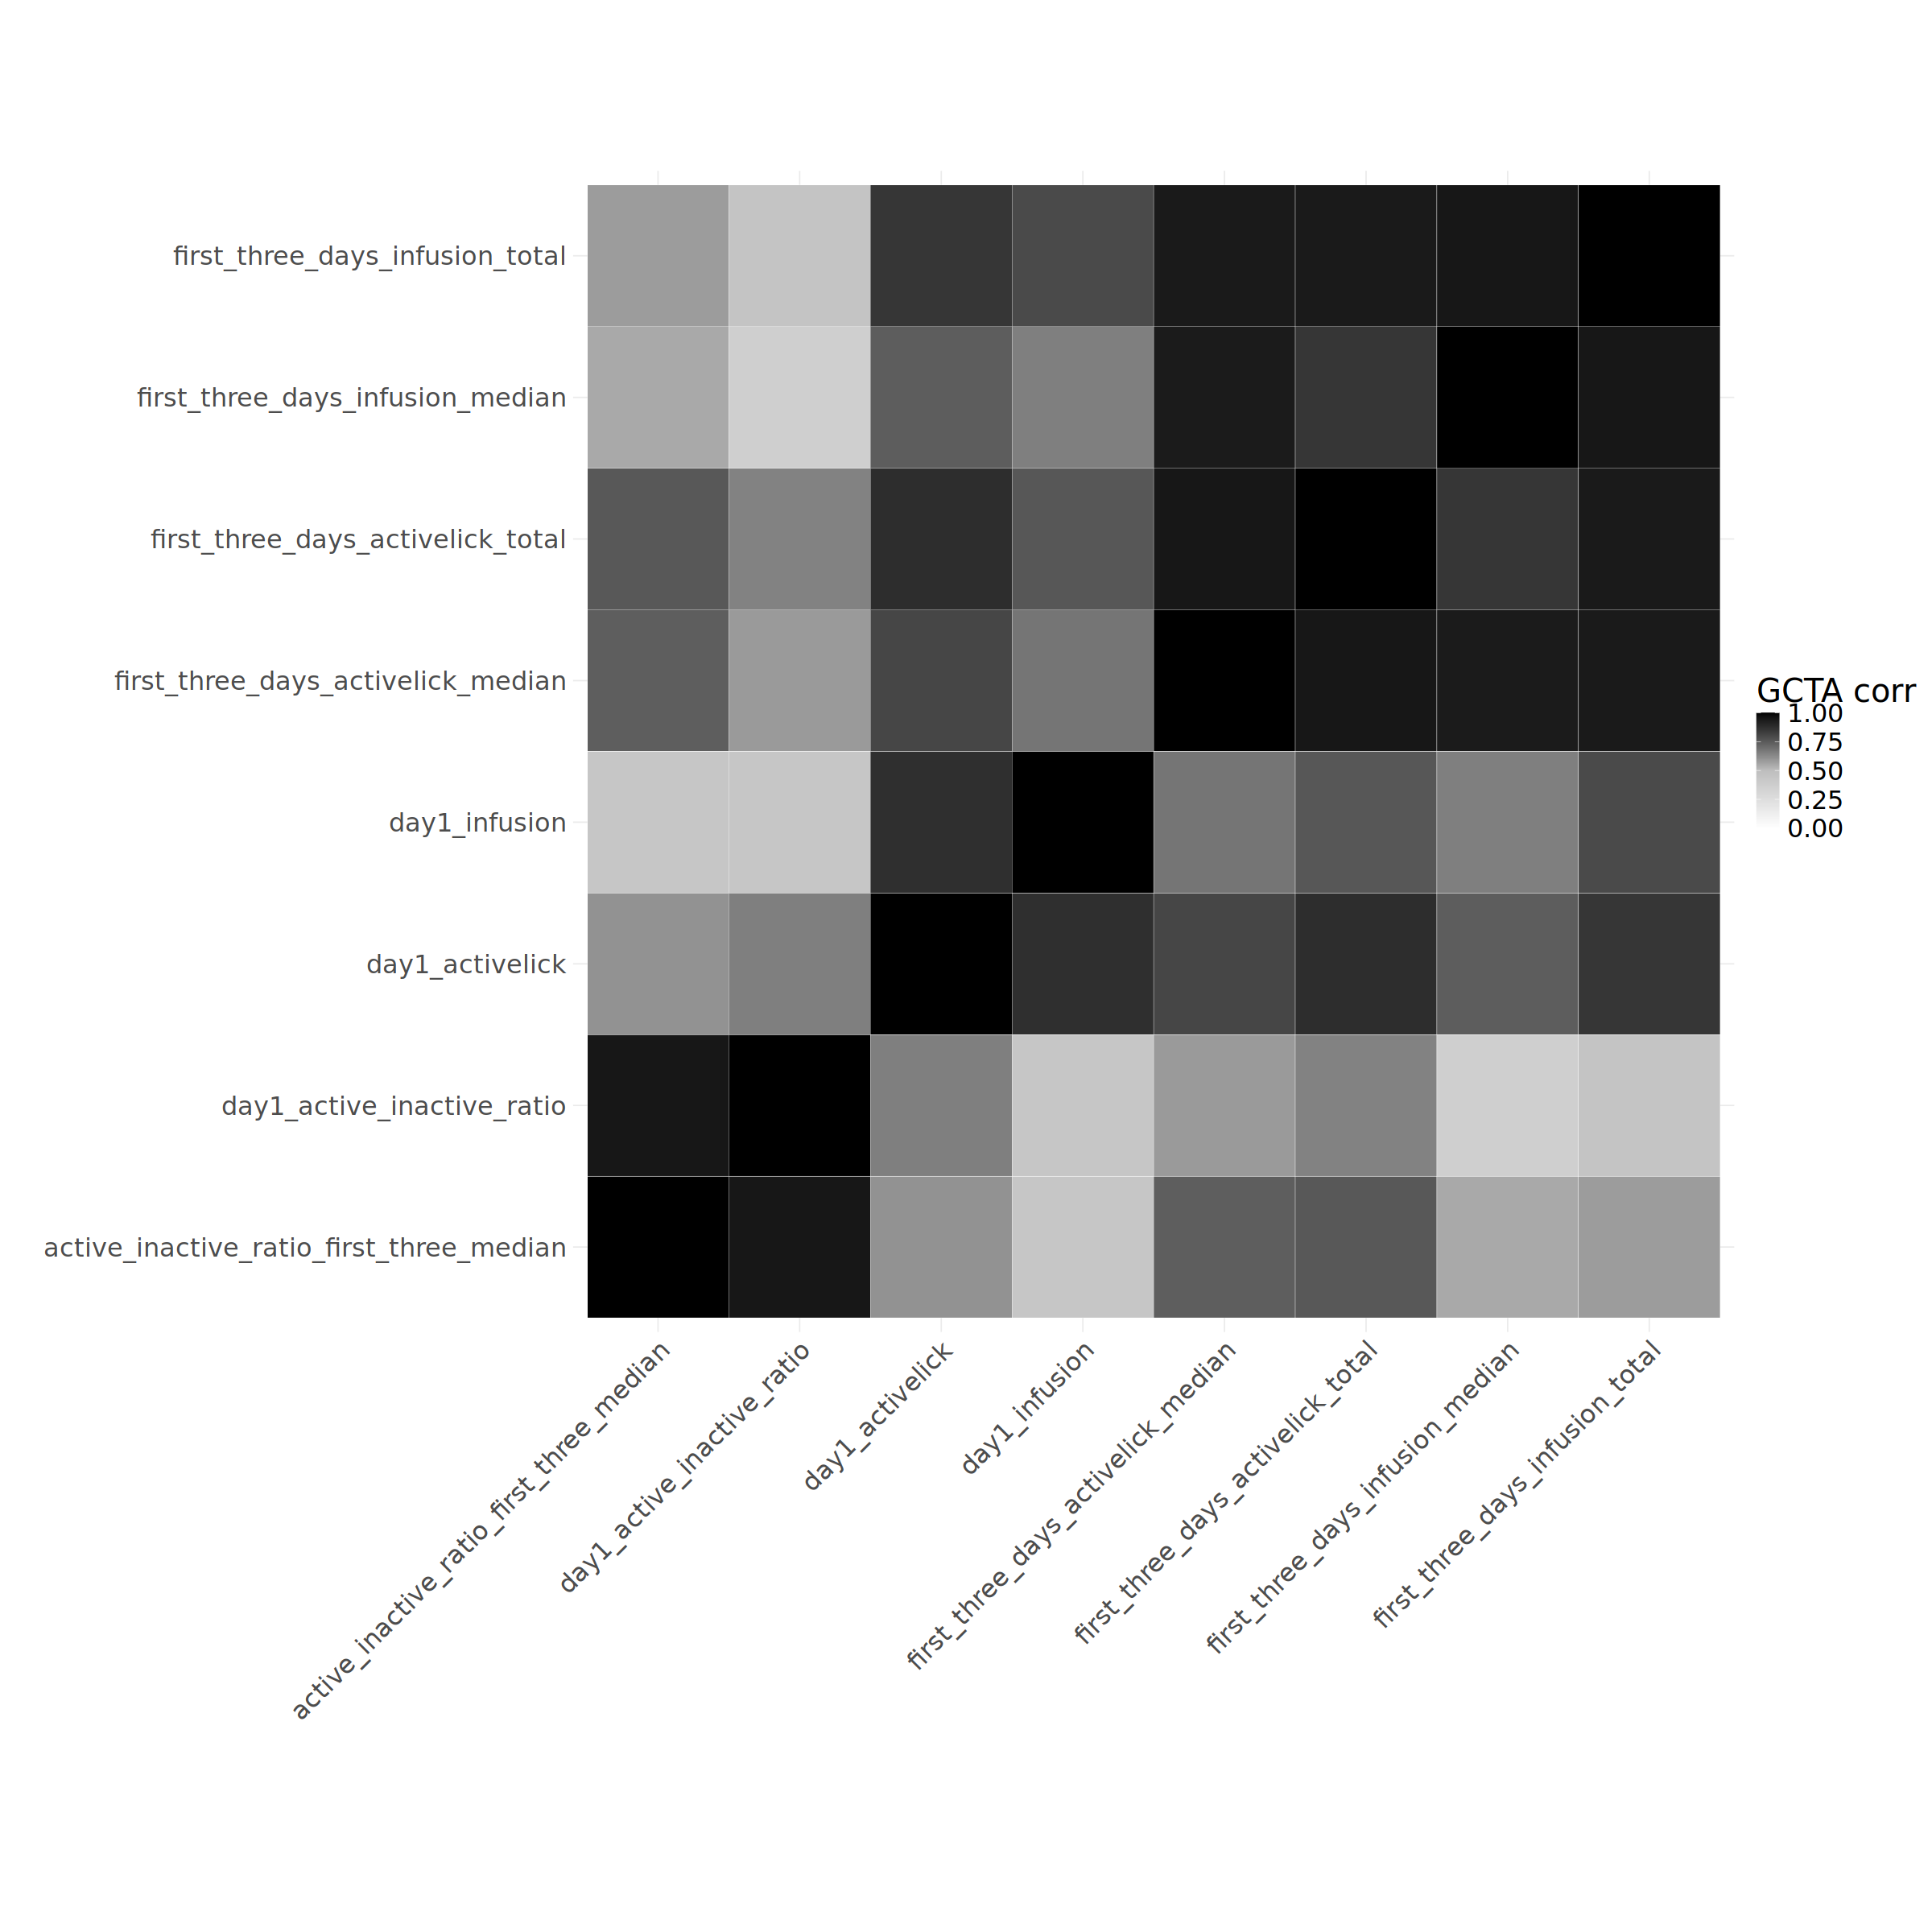

In [50]:
rerun=FALSE
if (rerun){F<-"GCTA_gen_correlation_smkinit_rerun.pdf"} else {F<-"GCTA_gen_correlation_smkinit.pdf"}
options(repr.plot.width=20, repr.plot.height=20)
P<-ggplot(data = gencor_smkinit, aes(x=Var1, y=Var2, fill=corr_GCTA)) + 
  geom_tile(color = "white")+
 scale_fill_gradient2(low = "white", high = "black", mid = "grey", 
   midpoint = 0.5, limit = c(0,1), space = "Lab",name='GCTA corr') +
  theme_minimal()+ 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
    theme(text = element_text(size = 24,colour='black'))+
    coord_equal()+
    xlab('')+
    ylab('')
ggsave(plot = P, filename = F, device = "pdf",scale=1,width=17,height=10)
P

In [63]:
summary(gencor_smkinit$corr_GCTA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3638  0.6361  0.7772  0.7619  0.9388  1.0000 

In [31]:
gencor_smkinit$parallel='smkinit'
gencor_cigday$parallel='cigday'
gencor_comb=rbind(gencor_smkinit, gencor_cigday)

# plot genetic correlation histograms based on parallel phenotype

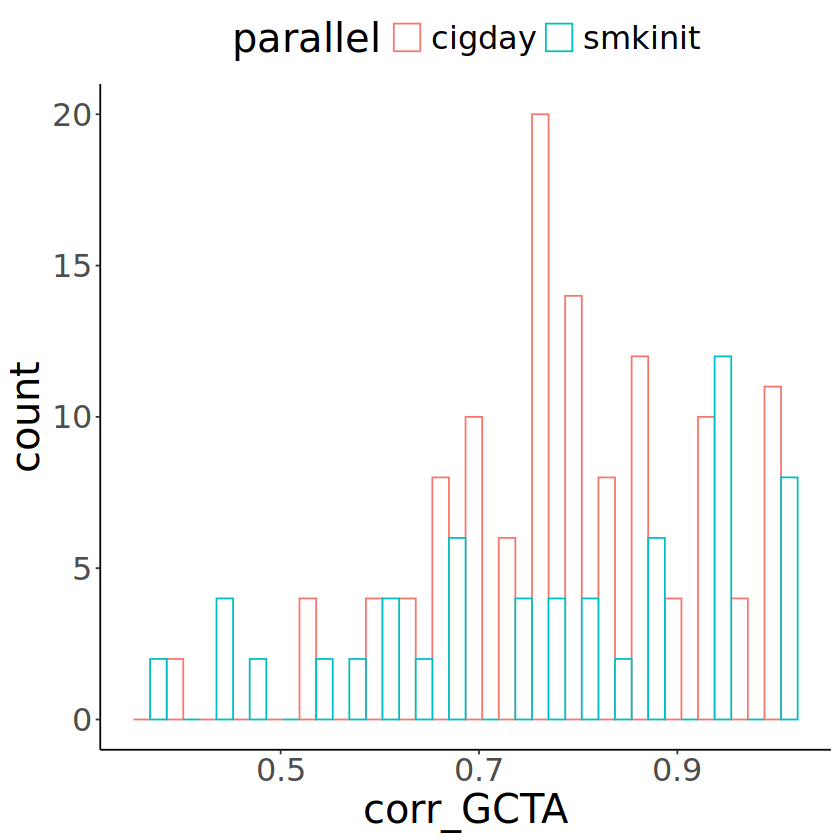

In [53]:
if (rerun){F<-"GCTA_gen_correlation_hist_comp_rerun.pdf"} else {F<-"GCTA_gen_correlation_hist_comp.pdf"}
P<-ggplot(gencor_comb, aes(x=corr_GCTA, color=parallel)) +
  geom_histogram(fill="white", position="dodge",bins=20)+
    theme(legend.position="top")+
    theme(text = element_text(size = 24,colour='black'))+
     theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
    panel.background = element_blank(), axis.line = element_line(colour = "black"))
    ggsave(plot = P, filename = F, device = "pdf",scale=1,width=17,height=10)

P

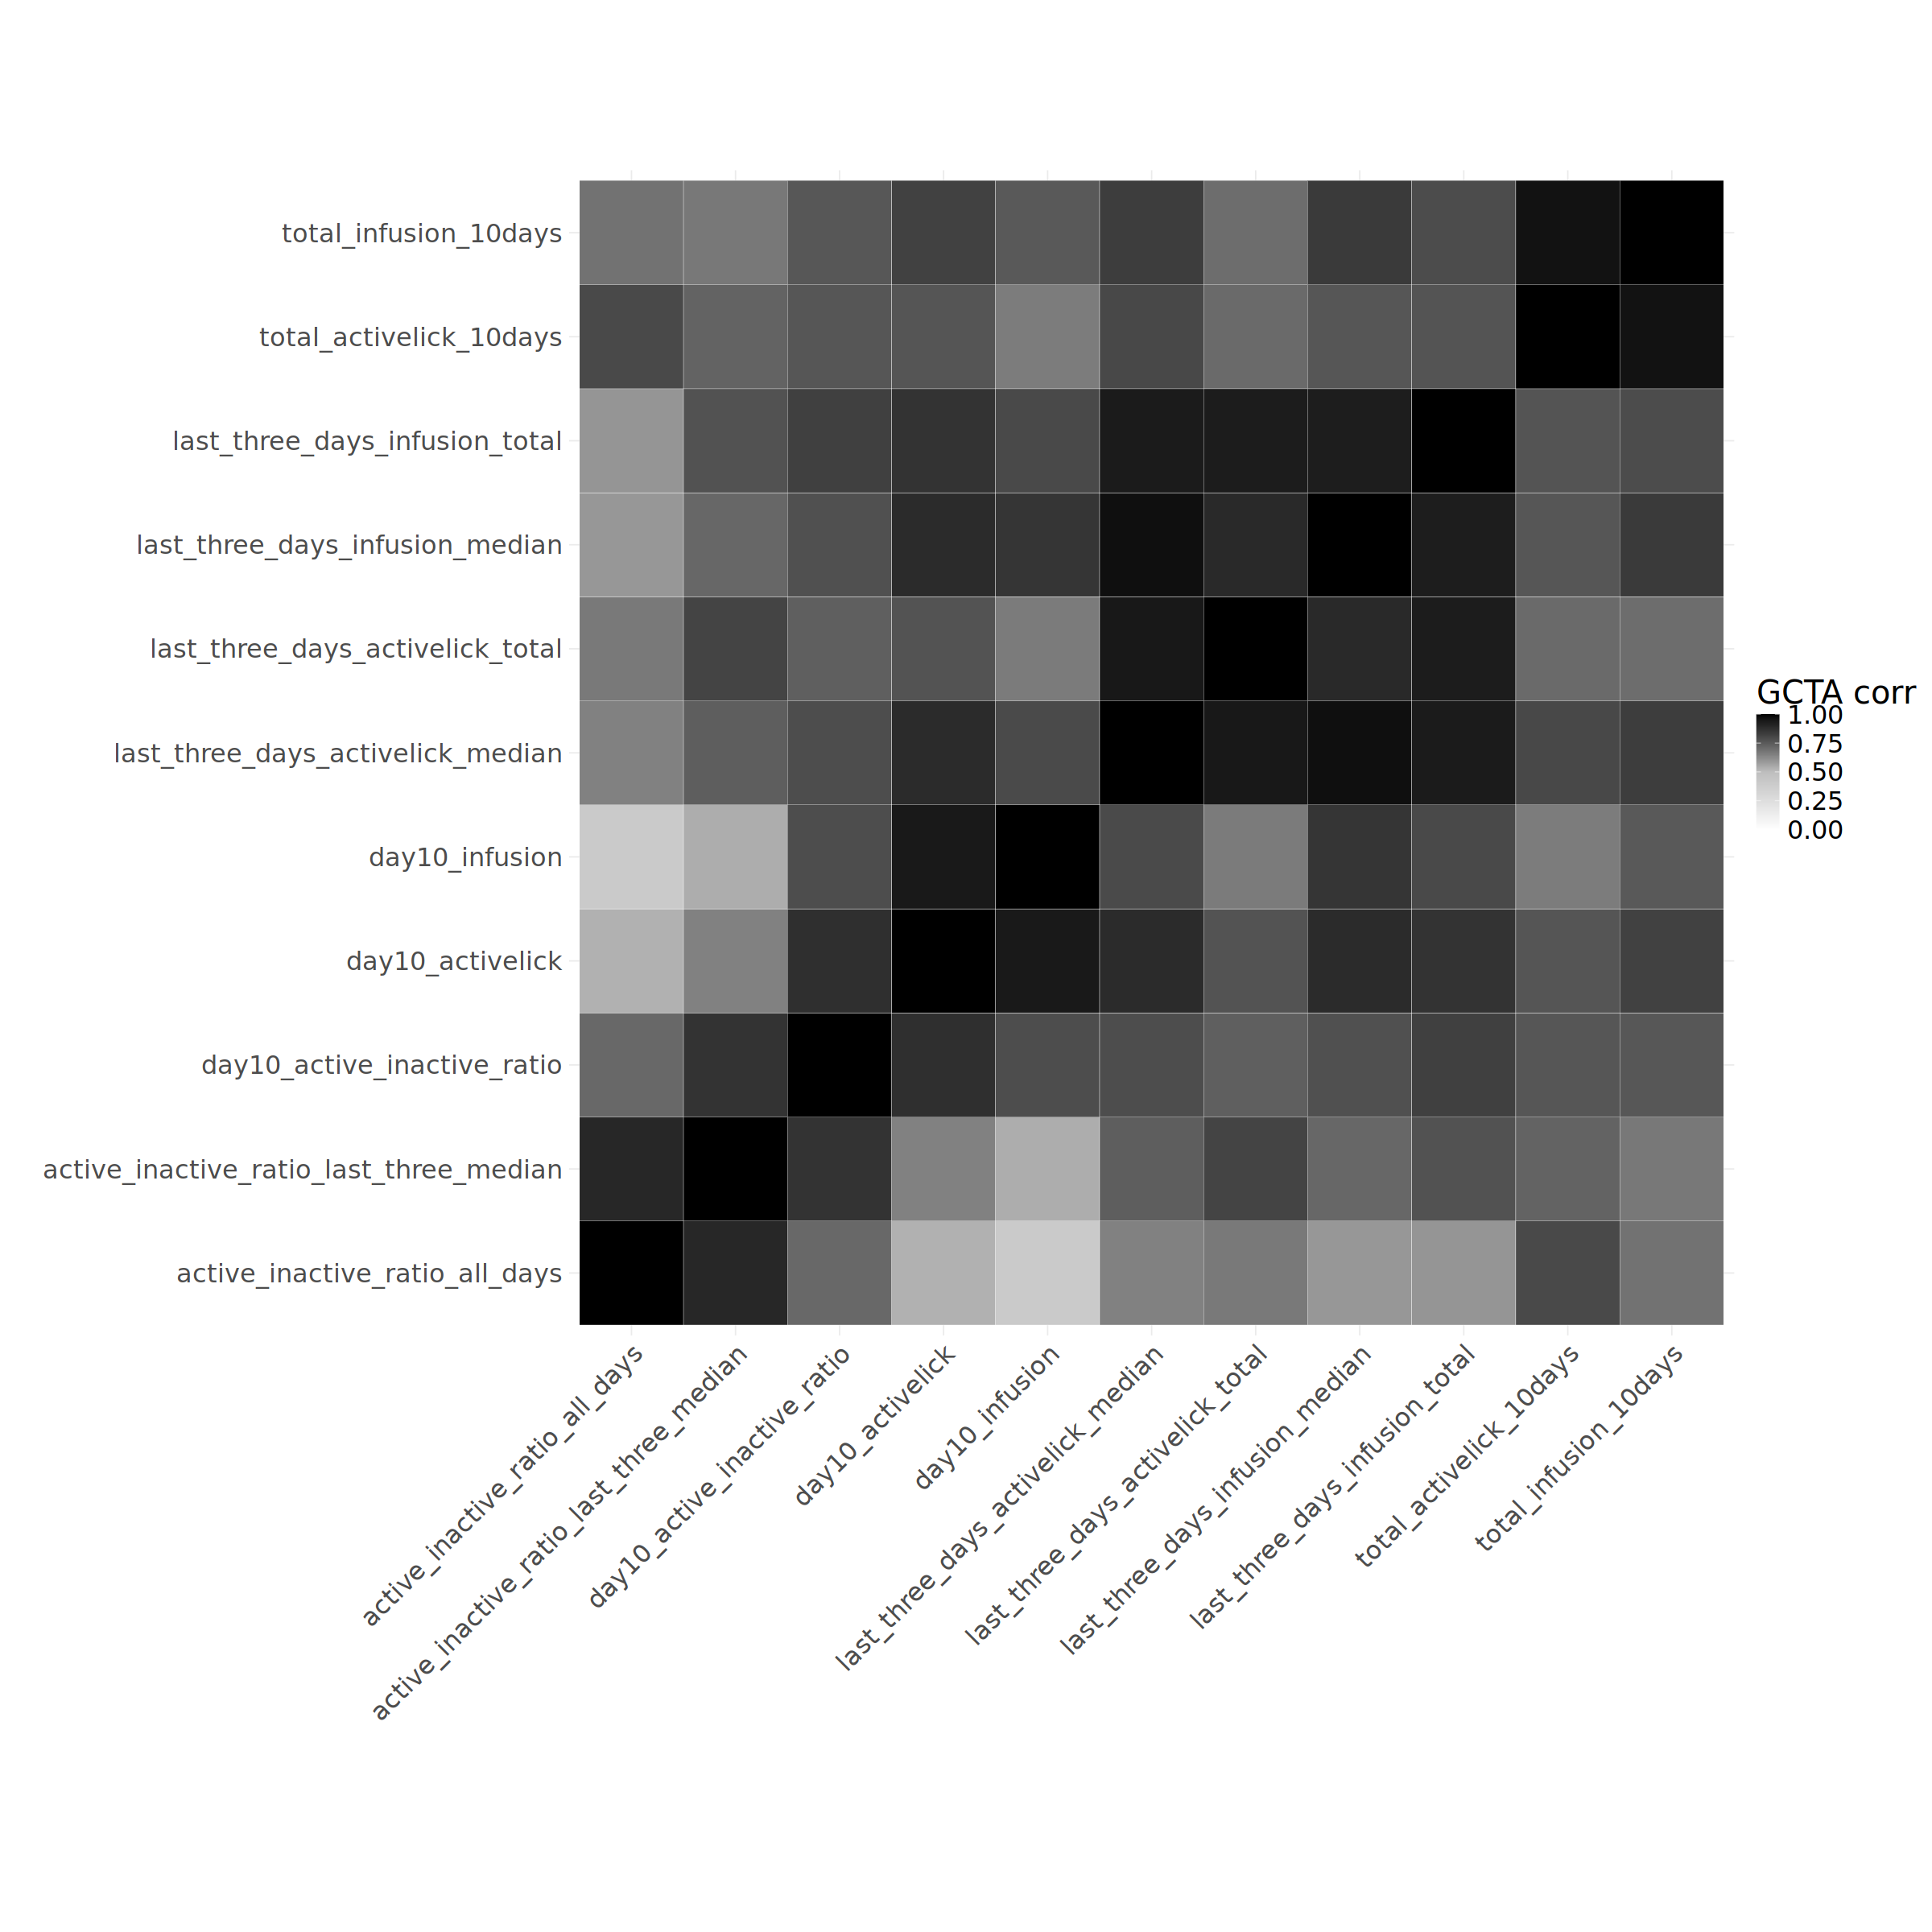

In [53]:
rerun=FALSE
if (rerun){F<-"GCTA_gen_correlation_cigday_rerun.pdf"} else {F<-"GCTA_gen_correlation_cigday.pdf"}
P<-ggplot(data = gencor_cigday, aes(x=Var1, y=Var2, fill=corr_GCTA)) + 
  geom_tile(color = "white")+
 scale_fill_gradient2(low = "white", high = "black", mid = "grey", 
   midpoint = 0.5, limit = c(0,1), space = "Lab",name='GCTA corr') +
  theme_minimal()+ 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
    theme(text = element_text(size = 24,colour='black'))+
    coord_equal()+
    xlab('')+
    ylab('')
ggsave(plot = P, filename = F, device = "pdf",scale=1,width=17,height=10)
P

In [61]:
summary(gencor_cigday$corr_GCTA)

[1] 0.403585

[1] 1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4036  0.7175  0.7888  0.7950  0.8867  1.0000 